# Сборный проект: "Анализ рынка компьютерных игр"

**Описание:** 

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Задача:** выполнить предобработку данных и изучить их, чтобы выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

**Источник данных:** база с информацией о вышедших компьютерных играх из открытых источников. Данные получу из файла '/datasets/games.csv'. <br>
В файле данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.
Данные за 2016 год могут быть неполными. <br>
Качество данных предстоит проверить.
<br><br>
**Свою работу над данными я выполню в несколько этапов:**

**Шаг 1. Открытие файла с данными и первое знакомство с ними** <br>
Путь к файлу: /datasets/games.csv. 
<br><br>
**Шаг 2. Подготовка данных** <br>
1. Замена названия столбцов (привести к нижнему регистру);
2. Обработайте пропуски при необходимости: <br>
    2.1. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; <br>
    2.2. Опишите причины, которые могли привести к пропускам;  <br>
    2.3. Обратите внимание на аббревиатуру tbd в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать; <br>
3. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; (поменяла местами пункты 2 и 3, так как перед преобразованием в нужный тип лучше заполнить пропуски.)
4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
<br><br>  

**Шаг 3. Исследовательский анализ данных**<br>
1. Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?<br>
2. Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?<br>
3. Возьмем данные за соответствующий **актуальный период**. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.<br>
4. Не учитывать в работе данные за **предыдущие годы**. <br>
5. Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.<br>
6. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.<br>
7. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.<br>
8. Соотнесем выводы с продажами игр на других платформах.<br>
9. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
<br><br> 
**Шаг 4. Составление портрета пользователя каждого региона** <br> <br>
Определим для пользователя каждого региона (NA, EU, JP): 
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж. <br>
2. Самые популярные жанры (топ-5). Поясните разницу. <br>
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
<br><br> 

**Шаг 5. Проверка гипотез** <br>
<ul> <li> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; </li> 
<li> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. </li></ul>
Зададим самостоятельно пороговое значение alpha. <br>
Поясним: <ul>
    <li> Как вы сформулировали нулевую и альтернативную гипотезы; </li>
    <li> Какой критерий применили для проверки гипотез и почему.</li>
</ul>

**Шаг 6. Общий вывод**




## Открытие файла с данными и первое знакомство с ними.

In [1]:
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sns.set()

data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
print(data.head())
print()
print(data.info())


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11

## Предобработка данных
### Приведем названия столбцов к нижнему регистру.<br>

In [2]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Пропуски в данных 
Посмотрим, где пропущены значения и сколько всего пропусков в столбцах.<br>
А также посчитаем общее количество строк в файле.

In [3]:
no_data = data.isna().sum().sort_values(ascending=False)
print(no_data)
print()
print('Всего строк в файле:', len(data))

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Всего строк в файле: 16715


**В 6 столбцах** отсутствуют значения, чаще всего пропуски встречаются в столбцах: 
* оценка критиков <i>'critic_score'</i>, 
* рейтинг <i>'rating'</i>,
* оценка пользователей <i>'user_score'</i>,
* год выпуска игры <i>'year_of_release'</i>. 


#### Заполняем столбец 'year_of_release'

В столбце <i>'year_of_release'</i> всего 269 пропусков из 16715 строк.<br> 
Выведем для наглядности часть данных в удобном формате, отфильтровав от A до Z по столбцу <i>'name'</i> строки с пропущенным значением <i>'year_of_release'</i>, чтобы затем найти в Интернете информацию о датах выхода по имени игр. <br>

In [4]:
no_year = data.loc[data['year_of_release'].isna()].sort_values( by='name', ascending=True)
no_year.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
11092,Action Man-Operation Extreme,PS,NaN,Action,0.05,0.03,0.00,0.01,NaN,NaN,NaN
3289,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
2106,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.00,0.01,NaN,NaN,NaN
12241,Alex Rider: Stormbreaker,DS,NaN,Action,0.06,0.00,0.00,0.00,48.0,6.1,T
8918,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
8547,Alone in the Dark: The New Nightmare,PS,NaN,Adventure,0.09,0.06,0.00,0.01,77.0,8.1,M


Мы видим, что с пропущенными датами можно работать - названия игр читабельны, а значит, поиск нам в помощь.<br>
Создадим словарь замены для подстановки найденных лет в столбец <i>'year_of_release'</i> по названию игры:

In [5]:
#Заполняем пропуски в столбце 'year_of_release'

#Создаем словарь через mapping
mapping = {
 'AKB1/48: Idol to Guam de Koishitara...': 2011,
 'Action Man-Operation Extreme': 2000,
 'Advance Wars: Days of Ruin': 2008,
 'Adventure': 1979,
 'Agarest Senki: Re-appearance': 2007,
 'Air-Sea Battle': 1977,
 'Alex Rider: Stormbreaker': 2006,
 'All-Star Baseball 2005': 2004,
 'Alone in the Dark: The New Nightmare': 2001,
 'Aquaman: Battle for Atlantis': 2003,
 'Atsumare! Power Pro Kun no DS Koushien': 2006,
 'B.L.U.E.: Legend of Water': 1998,
 'Backbreaker': 2007,
 'Battle vs. Chess': 2011,
 'Bejeweled 3': 2010,
 'Beyond the Labyrinth': 2012,
 'Big Beach Sports 2': 2010,
 'Bikkuriman Daijiten': 2007,
 'BioShock 2': 2010,    
 'Breakaway IV': 1978,
 'Brothers in Arms: Furious 4': -1, #разработка игры отменена, так и не вышла
 'Build-A-Bear Workshop: Friendship Valley': 2010,
 "Cabela's Alaskan Adventure": 2006,
 'Call of Duty 3': 2006,
 'Call of Duty: Black Ops': 2010,
 'Captain America: Super Soldier': 2011,   
 'Charm Girls Club: My Fashion Mall': 2009,
 'Charm Girls Club: My Fashion Show': 2009,  
 'Chou Soujuu Mecha MG': 2006,
 'Circus Atari': 1978,
 'Clockwork Empires': 2016,
 'College Hoops 2K6': 2005,
 'Combat': 1977,
 'Combat Elite: WWII Paratroopers': 2005,
 'Combat Wings: The Great Battles of WWII': 2012,
 "Cubix Robots for Everyone: Clash 'n' Bash": 2002,
 'Custom Robo': 1999,
 "Dance! It's Your Stage": 2011,
 'DanceDanceRevolution II': 2011,
 'Danganronpa: Trigger Happy Havoc': 2010,
 'Dead Island: Riptide': 2013,
 'Dead Space 3': 2013,
 'Def Jam: Fight for NY': 2004,
 'Demon Chaos': 2005,
 'Dinotopia: The Sunstone Odyssey': 2003,
 'Disgaea 3: Absence of Detention': 2008,
 "Disney's Chicken Little: Ace In Action": 2006,
 "Disney's Cinderella: Magical Dreams": 2005,
 'Donkey Kong Land III': 1997,
 'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)': 2006,
 'Dragster': 1980,
 'Drake of the 99 Dragons': 2003,
 'Dream Dancer': 2009,
 'Dream Trigger 3D': 2011,
 'Drill Dozer': 2005,
 'Egg Monster Hero': 2005,
 'eJay Clubworld': 2006,
 'Face Racers: Photo Finish': 2011,
 'Famista 64': 1997,
 'Ferrari: The Race Experience': 2010,
 'FIFA Soccer 2004': 2003,
 'Final Fantasy XI': 2002,
 'Fishing Derby': 1980,
 'Flag Capture': 1978,
 "Flip's Twisted World": 2010,
 'Football Manager 2007': 2006,   
 'Happy Feet Two': 2011,
 'Freaky Flyers': 2003,
 "Frogger's Adventures: Temple of the Frog": 2001,
 'Fullmetal Alchemist: Brotherhood': 2010,
 'Get Fit with Mel B': 2010,
 'Ghostbusters II': 1989,
 'GiFTPiA': 2003,
 'Godzilla: Destroy All Monsters Melee': 2002,
 'GRID': 2008,
 'Gun': 2005,
 'Hakuouki: Shinsengumi Kitan': 2010,
 'Half-Minute Hero 2': 2011,
 'Hangman': 1978,
 'Harvest Moon: Save the Homeland': 2001,
 'Harvest Moon: The Tale of Two Towns': 2010,
 'Haven: Call of the King': 2002,
 'Hitman 2: Silent Assassin': 2002,
 'Home Run': 1978,
 'Homeworld Remastered Collection': 2015,
 'Housekeeping': 2006,
 'Indy 500': 1977,
 'Inversion': 2012,
 "James Cameron's Dark Angel": 2002,
 'Jet Impulse': 2006,
 'Jet X20': 2002,
 'Jewel Link Chronicles: Mountains of Madness': 2012,
 'Jonah Lomu Rugby Challenge': 2011,
 'Jurassic Park: The Game': 2011,
 'Karate': 1982,
 'Legacy of Kain: Soul Reaver': 1999,
 'Legacy of Ys: Books I & II': 2009,
 'LEGO Batman: The Videogame': 2008,
 'LEGO Harry Potter: Years 5-7': 2011,
 'Rock Band': 2007,
 'WRC: FIA World Rally Championship': 2010,
 'LEGO Indiana Jones: The Original Adventures': 2008,
 'Luminous Arc 2 (JP sales)': 2008,
 "Luxor: Pharaoh's Challenge": 2007, 
 'Madden NFL 06': 2005,
 'Madden NFL 07': 2006,
 'Madden NFL 11': 2010,
 'Madden NFL 2002': 2001,
 'Madden NFL 2004': 2003,
 'Majesty 2: The Fantasy Kingdom Sim': 2009,
 'Major League Baseball 2K6': 2006,
 'Major League Baseball 2K8': 2008,
 'Mario Tennis': 2000,
 "Maze Craze: A Game of Cops 'n Robbers": 1978,
 "McFarlane's Evil Prophecy": 2004,
 'Mega Man Battle Network: Operation Shooting Star': 2009,
 'Mega Man X Collection': 2006,
 'Metal Gear Solid 2: Substance': 2002,
 'MLB SlugFest 20-03': 2002,
 'Mobile Ops: The One Year War': 2008,
 'Monster Hunter 2': 2006,
 'Monster Hunter Frontier Online': 2013,
 'Mountain Bike Adrenaline': 2007, 
 'Move Fitness': 2011,
 'My Healthy Cooking Coach': 2009,
 'Namco Museum': 2002,
 'NASCAR Thunder 2003': 2002,
 'NASCAR: Dirt to Daytona': 2002,
 'National Geographic Challenge!': 2011,
 'NBA Live 2003': 2002,
 'NBA Starting Five': 2002,
 'NBA Street Vol. 2': 2003,
 'NFL GameDay 2003': 2002,
 'NHL Hitz Pro': 2003,
 'NHL Slapshot': 2010,
 'Nicktoons: Battle for Volcano Island': 2006,
 'Nintendo Puzzle Collection': 2003,
 'Otomedius Excellent': 2011,
 'Our House Party!': 2009,
 'Pac-Man Fever': 2002,
 'Payout Poker & Casino': 2006,
 'PDC World Championship Darts 2008': 2008,
 'PES 2009: Pro Evolution Soccer': 2008,
 'Pet Zombies': 2011,
 'Port Royale 3': 2012,
 'Prinny: Can I Really Be The Hero? (US sales)': 2009,
 'Rayman Arena': 2002,
 'Reader Rabbit 2nd Grade': 1998,
 'Record of Agarest War Zero': 2009,
 'Rhythm Heaven': 2011,
 "Robert Ludlum's The Bourne Conspiracy": 2008,
 'Robotech: Battlecry': 2002,
 'Rock Revolution': 2008,
 'Rocksmith': 2013,
 'RollerCoaster Tycoon': 1999,
 'Runaway: A Twist of Fate': 2009,  
 'Sabre Wulf': 2004,
 'Saint': 2009,
 'Samurai Shodown Anthology': 2008,
 'Samurai Spirits: Tenkaichi Kenkakuden': 2005,
 'Saru! Get You! Million Monkeys': 2006,
 'Sega Rally 2006': 2006,
 'Shaun White Snowboarding': 2008,
 "Shonen Jump's Yu-Gi-Oh! GX Card Almanac": 2007,
 'Shorts': 2009,
 'Shrek the Third': 2007,
 'Silent Hill: Homecoming': 2008,
 'Singularity': 2010,
 'Slot Machine': 1979,
 'Smashing Drive': 2000,
 'Sonic the Hedgehog': 2006,
 'Space Invaders': 1978,
 'Splatterhouse': 1988,
 'Star Trek: Conquest': 2007,
 'Star Trek: Legacy': 2006,
 'Star Wars Jedi Knight II: Jedi Outcast': 2002,
 'Steal Princess': 2008,
 'Street Fighter IV': 2008,
 'Street Hoops': 2002,
 'Suikoden III': 2002,
 'Super Breakout': 1978,
 'Super Duper Sumos': 2003,
 'Super Puzzle Fighter II': 1996,
 'Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God': 2012,
 'Sword of the Samurai': 1986,
 'Swords': 2007,
 'Teen Titans': 2005,
 'TERA': 2011,
 'Test Drive Unlimited 2': 2011,
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe': 2005,
 'The Daring Game for Girls': 2010,
 'The Dukes of Hazzard II: Daisy Dukes It Out': 2000,
 'The Golden Compass': 2007,
 'The Hidden': 2011,
 'The History Channel: Great Battles - Medieval': 2010,
 'The King of Fighters: Maximum Impact - Maniax': 2004,
 'The Legend of Zelda: The Minish Cap(weekly JP sales)': 2004,
 'The Lord of the Rings: War in the North': 2011,
 'Tiger Woods PGA Tour 07': 2006,
 'Tom and Jerry in War of the Whiskers': 2002,
 "Tom Clancy's Rainbow Six: Critical Hour": 2006,
 'Tomb Raider (2013)': 2013,
 "Tony Hawk's Downhill Jam": 2006, 
 'Tornado': 2008,
 'Tour de France 2011': 2011,
 'Transworld Surf': 2001,
 'Trauma Team': 2010,
 'Tribes: Aerial Assault': 2002,
 'Triple Play 99': 1998,
 'Tropico 4': 2011,
 'Tube Slider': 2003,
 'Twisted Metal: Small Brawl': 2001,
 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku': 2011,
 'Unreal Championship 2: The Liandri Conflict': 2005,
 'Valkyria Chronicles III: Unrecorded Chronicles': 2011,
 'Vegas Party': 2009,
 'Virtua Quest': 2004,
 'WarioWare: Twisted!': 2004,
 'WCW Backstage Assault': 2000,
 'Wet': 2009,
 'Wii de Asobu: Metroid Prime': 2009,
 'Without Warning': 2005,
 'World of Tanks': 2010,
 'Writing and Speaking Beautiful Japanese DS': 2007,
 'wwe Smackdown vs. Raw 2006': 2005,
 'Yakuza 4': 2010,
 'Yoostar on MTV': 2011,
 'Yu Yu Hakusho: Dark Tournament': 2004,
 "Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)": 2009,
 'Zero: Tsukihami no Kamen': 2008,
 'Wheel of Fortune': 2003,
 'The Chronicles of Riddick: Escape from Butcher Bay': 2004   
}

#создаем маску, чтобы учла все вариации Nan, nan и пр.
mask = data['year_of_release'].astype('str').isin(['NaN','nan', 'NAN'])

#применяем собственно наш словарь через loc:
data.loc[mask, 'year_of_release'] = data.loc[mask, 'name'].map(mapping)

#Проверим, что данные заполняют столбец year_of_release. Подсчитаем, сколько NaN в нем осталось:
no_data = data.isna().sum().sort_values(ascending=False)
print(no_data.head(10))

critic_score       8578
rating             6766
user_score         6701
name                  2
genre                 2
platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
dtype: int64


#### Заполняем столбцы 'critic_score' и 'user_score'

Столбец 'critic_score' содержит оценки от 0 до 100.<br>
А вот в столбце 'user_score' оценки от 0 до 10, что не слишком удобно для сравнения со столбцом 'critic_score'. <br>
Разделим значения в 'critic_score' на 10, так как воспринимать рейтинг 4.5 привычнее и проще, чем 45.
<br> <br>
В столбцах 'critic_score' и 'user_score' вместо пропусков ставим -1. 
<br>Позже мы будем не брать ее при сравнении разных игр, -1 просто будет маркером, что здесь нет рейтинга. Есть, конечно, другой вариант - найти медиану для каждого столбца, но это будет не совсем честно, так как мы тогда размажем реальные оценки нашими приближенными.
<br>
#### Замена значения tbd
В столбце 'user_score' встречается оценка tbd - to be discussed, т.е. оценка игры неизвестна на момент внесения в базу.<br>
Уберем значение tbd, вместо него подставим -1. Это необходимо для того. чтобы далее перевести тип данных столбца в числовой. Так как у нас будут значения от 0 до 10 в обоих столбцах, типом данных выберем вещественный, float.

In [6]:
#Приводим critic_score к оценкам от 0 до 10, а не от 0 до 100:
data['critic_score'] = data['critic_score']/10
                            
#Заполняем столбец critic_score значением-маркером -1:
data['critic_score'] = data['critic_score'].fillna(value=-1)


#Заполняем столбец user_score, меняем tbd на -1 и nan на -1:
data['user_score'] = np.where(data['user_score'] == 'tbd', -1, data.user_score)
data['user_score'] = data['user_score'].fillna(value=-1)
data['user_score'] = data['user_score'].astype('float')

#Проверяем тип данных столбцов:
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08  

#### Заполняем столбцы 'name' и 'genre'
Выведем часть таблички с пропущенными значениями 'name' и 'genre'.

In [7]:
no_name = data.loc[data['name'].isna()].sort_values( by='name', ascending=True)
no_name.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,NaN


In [8]:
no_genre = data.loc[data['name'].isna()].sort_values( by='name', ascending=True)
no_genre.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,NaN


Обратим внимание - значения столбцов 'name' и 'genre' пропущены в одних и тех же строках. <br>
Кроме того, пустуют строки 'critic_score', 'user_score' и 'rating'.<br>
Идентифицировать эти игры только по году выхода и платформе невозможно. <br>
Поэтому удалим обе строки методом dropna().<br>

In [9]:
data = data.dropna (subset=['name'])
no_data = data.isna().sum().sort_values(ascending=False)
print(no_data)

rating             6764
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
dtype: int64


#### Заполняем столбец 'rating'

In [10]:
no_rating = data.loc[data['rating'].isna()].sort_values( by='year_of_release', ascending=False)
no_rating.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.0,0.0,0.01,0.0,-1.0,-1.0,NaN
14689,Samurai Warriors: Sanada Maru,PS4,2016.0,Action,0.0,0.0,0.03,0.0,-1.0,-1.0,NaN
6246,Ace Attorney 6,3DS,2016.0,Adventure,0.0,0.0,0.27,0.0,-1.0,-1.0,NaN
14606,Medabots Girls Mission: Metabee Ver. / Rokusho...,3DS,2016.0,Role-Playing,0.0,0.0,0.03,0.0,-1.0,-1.0,NaN
14604,Darius Burst: Chronicle Saviours,PSV,2016.0,Action,0.0,0.0,0.03,0.0,-1.0,-1.0,NaN


Для начала посмотрим, как по годам распределяются игры, у которых не указан рейтинг ESRB. <br>
Дело в том, что рейтинг начали присваивать играм с 1994 года, а у нас в базе есть игры, выпущенные даже 1970-х. Если окажется, что большинство игр без рейтинга относится к периоду с 1970-х до 1994, мы спокойно можем сказать, что у них рейтинга ESRB нет.

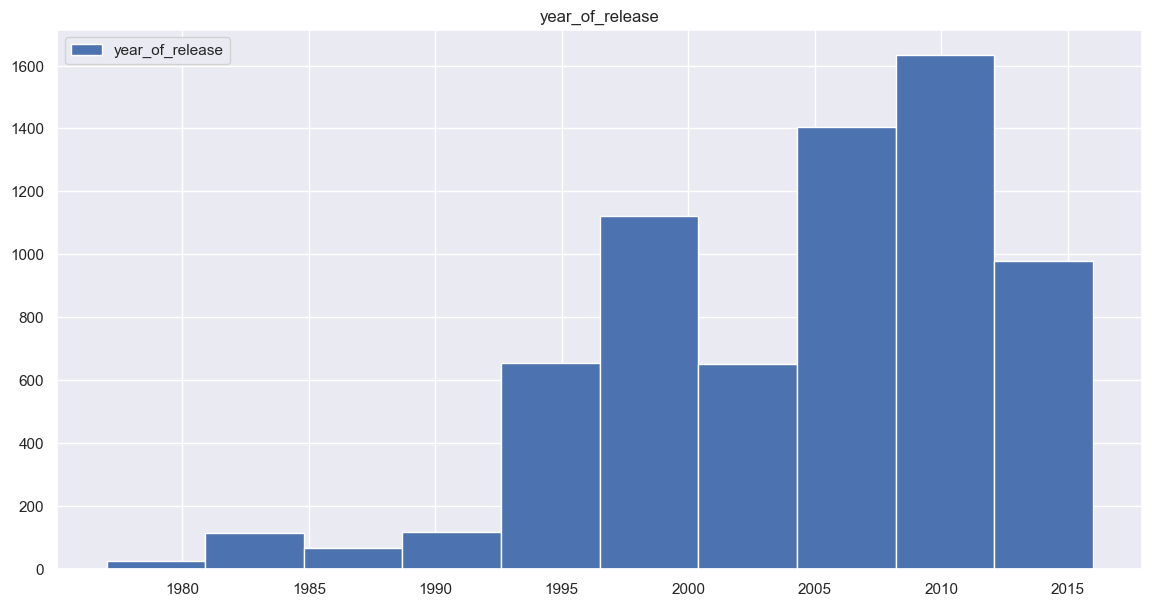

In [11]:
no_rating.hist('year_of_release', figsize=(14,7), legend=True)
plt.show()

Оказывается, большинство пропусков в столбце рейтинга относится к периоду, когда рейтинг уже начали присваивать. <br>
У нас есть два варианта:
1. Вручную найти рейтинг по каждой игре, как это делали с годом выпуска.
2. Присвоить значение Unknown и далее в анализе данных использовать это значение как маркер.

Так как недостающих данных в столбце 'rating' много, 6764 значений, воспользуемся вторым вариантом.

In [12]:
data['rating'] = data['rating'].fillna(value='Unknown')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown


In [13]:
data = data.dropna (subset=['name'])
no_data = data.isna().sum().sort_values(ascending=False)
print(no_data)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


#### Резюме по подготовке данных.
Итак, все пропуски заполнены.
Причины, которые могли привести к пропускам: 
* ошибка во время выгрузки данных (например, пропущенные названия в столбце 'name'). 
* человеческий фактор (вручную не внесли данные, например, в столбцы 'year_of_release', 'genre')
* на момент внесения в базу информации не было (например, для оценок 'user_score').

<hr>

### Преобразуем данные в нужные типы 

Выше мы узнали, какие типы данных у каких столбцов. Столбец <i>'user_score'</i> я уже перевела из object в float. <br>
Вспомним:
<br>
 1.    name             - (текстовый) object <br>
 2.    platform         - (текстовый) object <br> 
 3.    year_of_release  - (вещественные числа) float64 <br>
 4.    genre            - (текстовый) object <br>
 5.    na_sales         - (вещественные числа) float64 <br>
 6.    eu_sales         - (вещественные числа) float64 <br>
 7.    jp_sales         - (вещественные числа) float64 <br>
 8.    other_sales      - (вещественные числа) float64 <br>
 9.    critic_score     - (вещественные числа) float64 <br>
 10.   user_score      - (вещественные числа) float64 <br>
 11.   rating           - (текстовый) object <br>
<br>

Типы данных практически всех столбцов соответствуют содержимому. <br>
Только столбец <i>'year_of_release'</i> я бы перевела в целочисленный, чтобы избавиться от лишних знаков. 
<br> Остальные столбцы оставляем как есть.

In [14]:
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()
print()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform 

### Добавление столбца "Суммарные продажи во всех регионах"

Добавим столбец 'all_sales', сложив продажи четырех столбцов: 'na_sales', 'eu_sales', 'jp_sales' и 'other_sales'.

Также поменяем очередность столбцов, чтобы новый столбец продаж шел перед остальными тремя.

In [15]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

#Меняем порядок столбцов:
data = data.reindex(columns=['name', 'platform', 'year_of_release', 'genre', 'all_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'])
data.head()

,name,platform,year_of_release,genre,all_sales,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,82.54,41.36,28.96,3.77,8.45,7.6,8.0,E
1,Super Mario Bros.,NES,1985,Platform,40.24,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown
2,Mario Kart Wii,Wii,2008,Racing,35.52,15.68,12.76,3.79,3.29,8.2,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,15.61,10.93,3.28,2.95,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,31.38,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown


### Проверка на явные и неявные дубликаты

В конце предобработки на всякий случай проведем проверку на <b>явные</b> дубликаты. <br>
А также убедимся, что у нас нет <b>неявных</b> дубликатов в названиях платформ и жанров. <br>
Нам известно также, что игры повторяются по названию. Это нормально, так как в нашей таблице, если игра выходила на разных платформах, она записана разными строками. <br>
Из любопытства можем взглянуть, какие названия чаще всего встречаются.


In [16]:
#Проверка на явные дубликаты:
print('Полных совпадений строк:', data.duplicated().sum())
print()

#Проверка на неявные дубликаты в 'platform', 'genre':
print(data['platform'].unique())
print()
print(data['genre'].unique())
print()

#Совпадений по названию:
print(data['name'].value_counts())
print()
print('Совпадений по названию:', data['name'].duplicated().sum())

Полных совпадений строк: 0

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

Совпаден

### Вывод

Предобработка данных выполнена. Пропуски заполнены, типы данных изменены. Новый столбец добавлен, порядок столбцов обновлен.<br>
Из положительного - почти не потеряли данные, убрали только 2 строки из почти 17 тысяч.<br>
Явных и неявных дубликатов не обнаружено. <br>
Можно приступать к исследовательскому анализу.

## Исследовательский анализ данных
### Cколько игр выпускалось в разные годы. 

Важны ли данные за все периоды?

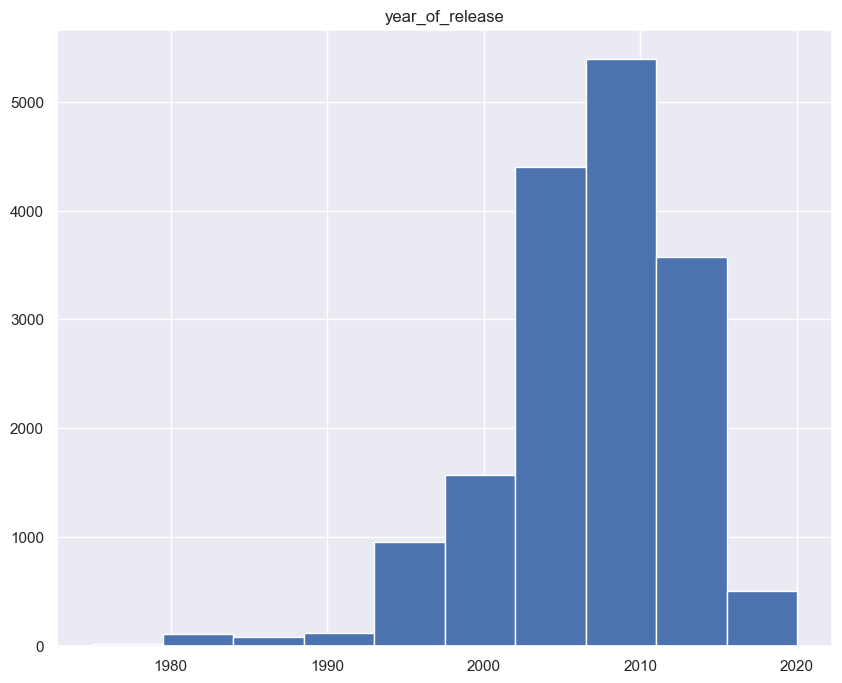

 2008    1452
 2009    1443
 2010    1282
 2007    1214
 2011    1176
 2006    1030
 2005     955
 2002     853
 2003     788
 2004     774
 2012     660
 2015     607
 2014     581
 2013     549
 2016     503
 2001     488
 1998     382
 2000     355
 1999     341
 1997     291
 1996     264
 1995     219
 1994     121
 1993      60
 1981      46
 1992      43
 1991      41
 1982      37
 1986      22
 1989      18
 1983      17
 1987      16
 1988      16
 1990      16
 1985      14
 1984      14
 1980      11
 1978       8
 1977       3
 1979       2
-1          1
Name: year_of_release, dtype: int64


In [17]:
#Посмотрим на графике:
data.hist('year_of_release', figsize=(10, 8), range=(1975,2020))
plt.show()

#И на общее количество игр по годам:
top_years = data['year_of_release'].value_counts().sort_values(ascending=[False])
print(top_years)

Мы видим, что большая часть игр была выпущена за пятнадцать лет - с 2002 по 2016 годы  - 13867 из 16713 (или 83%). <br>
В то время как с 1977 по 1993 годы вышло всего 385 игр (или 2.2%).
<br><br>
Так как целью нашей работы является прогноз на 2017-й год, данные 25-30-летней давности, да еще с таким небольшим количеством игр, нам не понадобятся. Я предлагаю отсечь часть данных, и взять пока с 1994 по 2016 годы. <br>
Далее, возможно, мы еще сократим нашу выборку.


In [18]:
#Берем данные с 1994 года, проверим, что выборка получилась, с помощью фильтра:
updated_data = data.query("year_of_release > 1993").sort_values(by=['year_of_release'], ascending=[True])
updated_data.head()

,name,platform,year_of_release,genre,all_sales,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15788,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,0.02,0.00,0.00,0.02,0.00,-1.0,-1.0,Unknown
11563,Yuu Yuu Hakusho: Makyo Toitsusen,GEN,1994,Fighting,0.08,0.00,0.00,0.08,0.00,-1.0,-1.0,Unknown
4348,NHL FaceOff,PS,1994,Sports,0.45,0.25,0.17,0.00,0.03,-1.0,-1.0,Unknown
11781,Formula One World Championship: Beyond the Limit,SCD,1994,Racing,0.07,0.00,0.00,0.07,0.00,-1.0,-1.0,Unknown
14132,Castlevania Bloodlines,GEN,1994,Platform,0.04,0.00,0.00,0.04,0.00,-1.0,-1.0,Unknown


### Как менялись продажи по платформам. 
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. <br>
За какой характерный срок появляются новые и исчезают старые платформы?

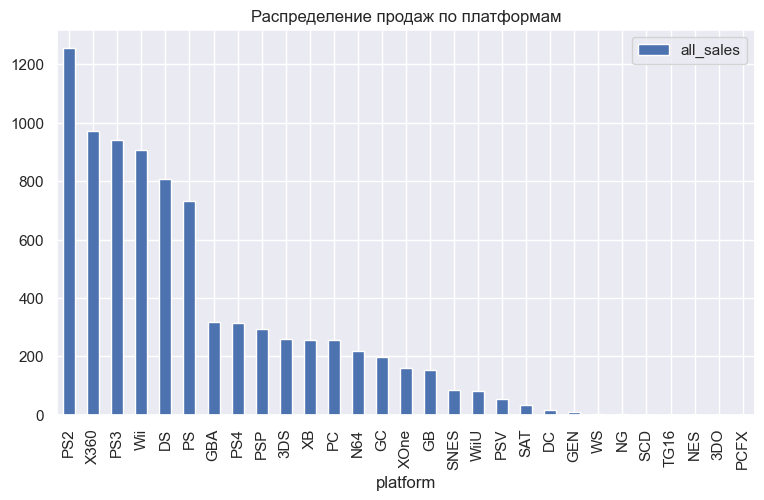

,all_sales
platform,
PS2,1255.6
X360,971.4
PS3,939.5
Wii,907.5
DS,806.1
PS,730.9
GBA,317.8
PS4,314.1
PSP,294.0


In [19]:
top_platforms = updated_data['platform'].value_counts().head(30).index
top_all_sales = updated_data.query('platform in @top_platforms').pivot_table(values='all_sales', aggfunc=np.sum, index ='platform').round(1)

sales_platforms = top_all_sales.groupby('platform')['all_sales'].median().reset_index().sort_values(by='all_sales', ascending=False)    
sales_platforms.plot(title='Распределение продаж по платформам', x='platform', y='all_sales', kind='bar', figsize=(9,5), legend=True)
plt.show()

display(top_all_sales.sort_values('all_sales', ascending=False).head(10))



Выше мы выбрали топ-10 платформ из 29 с наибольшими продажами. 

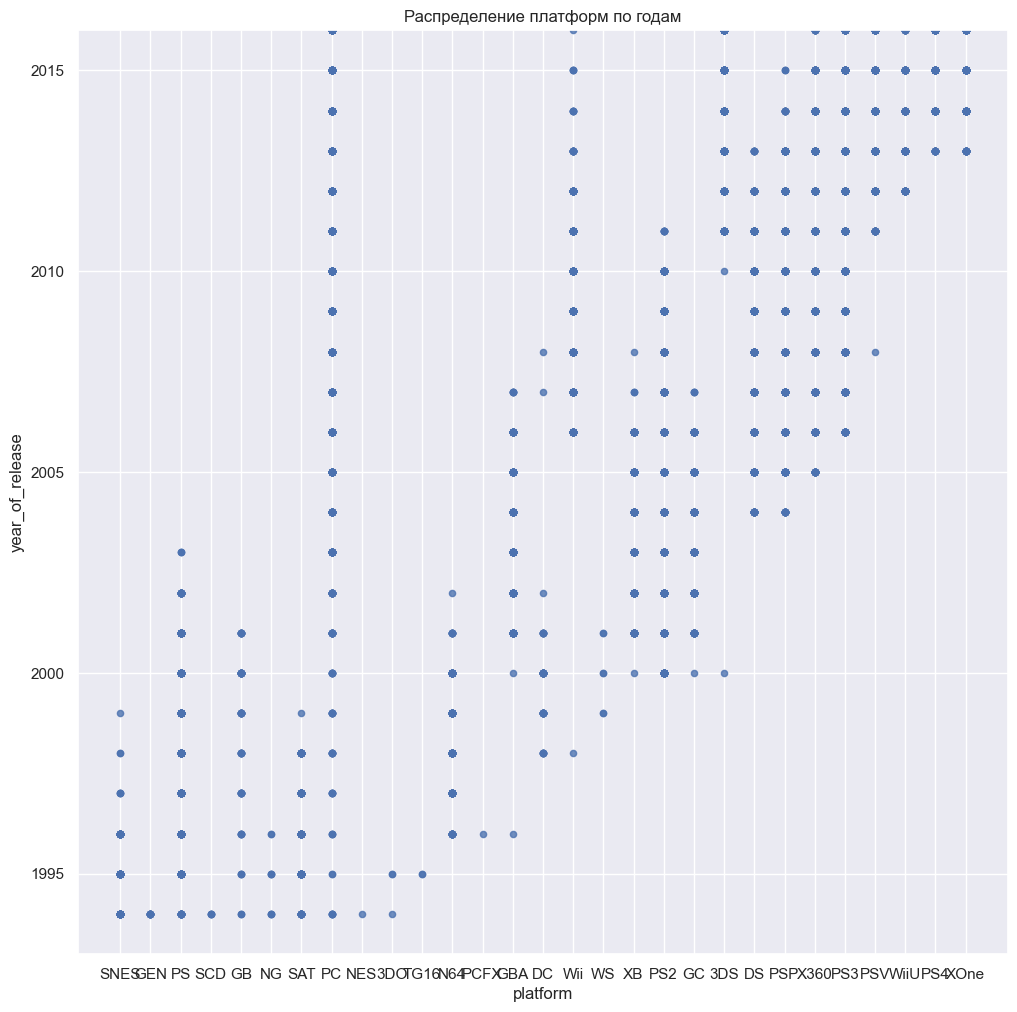

In [20]:
updated_data.plot(title='Распределение платформ по годам', x='platform', y='year_of_release', ylim=(1993,2016), kind='scatter', grid=True, figsize=(12, 12), alpha=0.8)
plt.show()


<b>За какой характерный срок появляются новые и исчезают старые платформы?</b><br>
На графике видно, что большинство платформ живет в среднем около 7-8 лет.<br>
В самом начале продолжительность "жизни" платформ была еще короче - до 5 лет (Snes, Gen, SCD, NG, SAT и др.)<br>
Исключение - PC (компьютер), на нем игры появляются всегда. <br>
Среди платформ "долгожителями" можно считать Wii, PS2 и X360 - 10 и более лет.

### Взять данные за соответствующий актуальный период.
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. <br>
Основной фактор — эти данные помогут построить прогноз на 2017 год.
<br><br>
На основании полученной выше информации я предлагаю считать актуальным периодом пятилетний промежуток с <b>2012 по 2016</b> годы включительно, учитывая минимальный срок жизни платформ в 5 лет и окончание выхода в 2008 году игр на такие платформы, как Xbox, DC, PSV, а в 2011 - на самую продаваемую по играм платформу PS2. <br>
Если бы мы оставили ее в выборке, это не слишком помогло бы в нашем исследовании, но повлияло бы на его чистоту. <br>
Кроме того, в 2012-2013 годах появились новые платформы: WiiU, PS4, XOne.
<br>
В ближайшие годы очередной ряд платформ уступит свое лидерство (X360, PS3 и другие), и можно будет отследить эту тенденцию. <br>

In [21]:
actual_data = updated_data.query("year_of_release >= 2012").sort_values(by=['year_of_release'], ascending=[True])
print(actual_data.head())
print()
print('Всего в выборке строк:', actual_data['name'].count())

                                                    name platform  \
8034                                      Ninja Gaiden 3     WiiU   
2963                      LEGO Batman 2: DC Super Heroes       DS   
12482  Jissen Pachislot Secrets! Fist of the North St...      PS3   
15543               Steins;Gate: Hiyoku Renri no Darling      PS3   
2995           Kirby's Dream Collection: Special Edition      Wii   

       year_of_release      genre  all_sales  na_sales  eu_sales  jp_sales  \
8034              2012     Action       0.19      0.14      0.03      0.00   
2963              2012     Action       0.69      0.39      0.24      0.00   
12482             2012     Action       0.06      0.00      0.00      0.06   
15543             2012  Adventure       0.02      0.00      0.00      0.02   
2995              2012     Action       0.68      0.33      0.00      0.33   

       other_sales  critic_score  user_score   rating  
8034          0.02          -1.0        -1.0  Unknown  
2963

#### Вывод
Итак, у нас получилась выборка actual_data за 5 лет, с 2012 по 2016 годы включительно, в количестве 2900 строк.

### Какие платформы лидируют по продажам, растут или падают? <br>
Выберите несколько потенциально прибыльных платформ.
<br>
Посмотрим, какие платформы вообще остались в нашей выборке actual_data.

In [22]:
print(actual_data['platform'].unique())

['WiiU' 'DS' 'PS3' 'Wii' '3DS' 'PC' 'X360' 'PSP' 'PSV' 'XOne' 'PS4']


Итак, с 2012 года у нас остается 11 платформ.  <br>
Отсортируем данные, оставив только нужные нам столбцы: platform, year_of_release и all_sales.

In [23]:
actual_data_sorted = actual_data[['platform', 'year_of_release', 'all_sales']].sort_values(by='all_sales', ascending=False) 
actual_data_sorted.head(10)

,platform,year_of_release,all_sales
16,PS3,2013,21.05
23,X360,2013,16.27
31,PS4,2015,14.63
33,3DS,2013,14.60
34,PS3,2012,13.79
35,X360,2012,13.68
42,PS4,2014,12.62
47,3DS,2014,11.68
60,X360,2013,10.24
62,3DS,2012,9.90


Для каждой из 11 платформ построим свою табличку и свой график, чтобы повнимательнее изучить динамику продаж внутри платформ по годам.

Платформа Nintendo Wii

      platform  year_of_release  all_sales
8009       Wii             2016       0.18
8941       Wii             2015       0.15
2179       Wii             2015       0.95
14682      Wii             2015       0.03
16312      Wii             2015       0.01
850        Wii             2014       2.01
16144      Wii             2014       0.01
13570      Wii             2014       0.04
2180       Wii             2014       0.95
3611       Wii             2014       0.56

Платформа Nintendo Wii, продажи по годам:
                 all_sales
year_of_release           
2012                 21.73
2013                  8.59
2014                  3.75
2015                  1.14
2016                  0.18


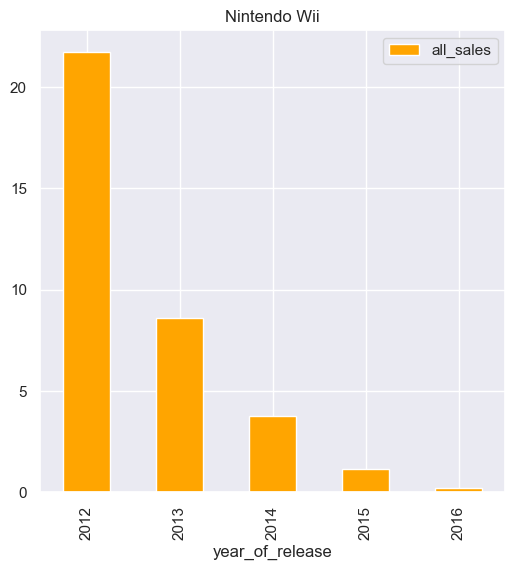

In [24]:
#Платформа Nintendo Wii:
wii_sales = actual_data_sorted.loc[actual_data_sorted.loc[ :,'platform'] =='Wii'].sort_values(by='year_of_release', ascending=False) 
print('Платформа Nintendo Wii')
print()
print(wii_sales.head(10))
print()

wii_sales_total = wii_sales.groupby(['year_of_release'])[['all_sales']].agg('sum')
print('Платформа Nintendo Wii, продажи по годам:')
print(wii_sales_total.head())

wii_sales_total.plot(title='Nintendo Wii', kind='bar', color='orange', grid=True, figsize=(6, 6), legend=True)
plt.show()

У Wii продажи по годам падают из года в год, мы видим, как некогда одна из крупнейших по продажам платформ угасает.


Платформа Nintendo DS

      platform  year_of_release  all_sales
14353       DS             2013       0.03
11973       DS             2013       0.08
3862        DS             2013       0.51
5054        DS             2013       0.38
7460        DS             2013       0.21
7993        DS             2013       0.18
14716       DS             2013       0.03
9753        DS             2013       0.12
15424       DS             2012       0.02
14956       DS             2012       0.02

Платформа Nintendo DS, продажи по годам:
                 all_sales
year_of_release           
2012                 11.07
2013                  1.54


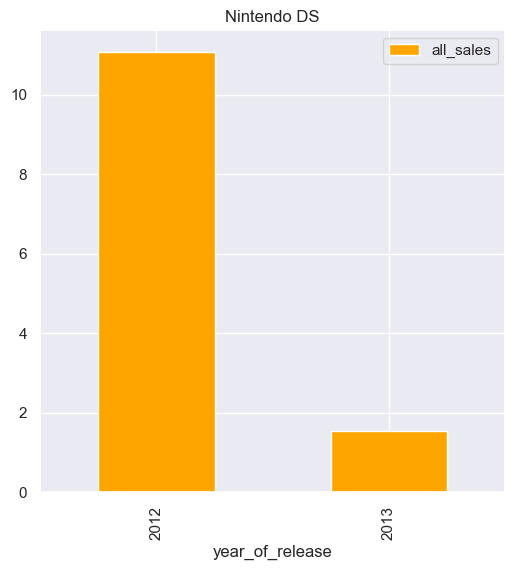

In [25]:
#Платформа Nintendo DS:
ds_sales = actual_data_sorted.loc[actual_data_sorted.loc[ :,'platform'] =='DS'].sort_values(by='year_of_release', ascending=False) 
print('Платформа Nintendo DS')
print()
print(ds_sales.head(10))
print()

ds_sales_total = ds_sales.groupby(['year_of_release'])[['all_sales']].agg('sum')
print('Платформа Nintendo DS, продажи по годам:')
print(ds_sales_total.head())

ds_sales_total.plot(title='Nintendo DS', kind='bar', color='orange', grid=True, figsize=(6, 6), legend=True)
plt.show()

Та же ситуация с падением продаж у Nintendo DS. По сути, 2013 год - последний год выхода игр на DS, и эта платформа становится неактуальной.
<br>
Из интересного, продажи игр на Nintendo DS в 2012 году в 2 раза ниже, чем у Nintendo Wii.

Персональные компьютеры PC

      platform  year_of_release  all_sales
9292        PC             2016       0.13
6995        PC             2016       0.23
13672       PC             2016       0.04
13259       PC             2016       0.04
16280       PC             2016       0.01
7778        PC             2016       0.20
15407       PC             2016       0.02
16025       PC             2016       0.01
7328        PC             2016       0.22
16201       PC             2016       0.01

Персональные компьютеры PC:
                 all_sales
year_of_release           
2012                 23.23
2013                 13.12
2014                 13.28
2015                  8.53
2016                  5.29


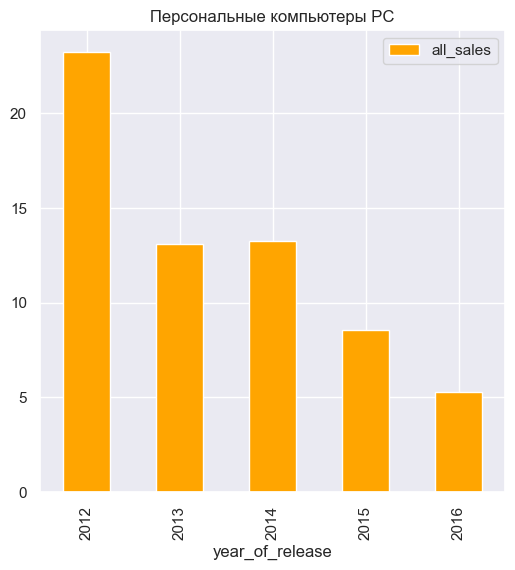

In [26]:
#Персональные компьютеры PC:
pc_sales = actual_data_sorted.loc[actual_data_sorted.loc[ :,'platform'] =='PC'].sort_values(by='year_of_release', ascending=False) 
print('Персональные компьютеры PC')
print()
print(pc_sales.head(10))
print()

pc_sales_total = pc_sales.groupby(['year_of_release'])[['all_sales']].agg('sum')
print('Персональные компьютеры PC:')
print(pc_sales_total.head())

pc_sales_total.plot(title='Персональные компьютеры PC', kind='bar', color='orange', grid=True, figsize=(6, 6), legend=True)
plt.show()

Удивительно, но суммарные продажи игр на PC тоже сокращаются из года в год. <br>
И 2012 год был максимальным по объемам продаж в нашей выборке 2012-2016 годов. <br>
Учитывая, что новые игры появляются на PC с самых ранних времен, и их продолжают выпускать, интересно, с чем может быть связано падение продаж.
<br>


PS3

      platform  year_of_release  all_sales
16691      PS3             2016       0.01
9360       PS3             2016       0.13
9465       PS3             2016       0.13
9629       PS3             2016       0.12
9887       PS3             2016       0.12
9954       PS3             2016       0.12
9833       PS3             2016       0.12
9856       PS3             2016       0.12
15184      PS3             2016       0.02
15620      PS3             2016       0.02

PS3:
                 all_sales
year_of_release           
2012                107.43
2013                113.30
2014                 47.76
2015                 16.82
2016                  3.60


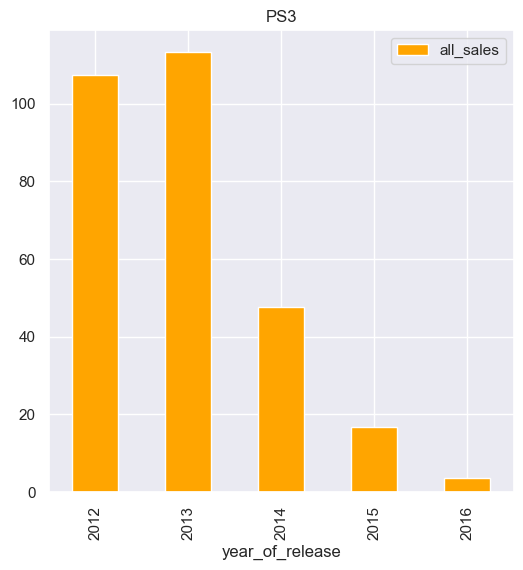

In [27]:
#PS3:
ps_3_sales = actual_data_sorted.loc[actual_data_sorted.loc[ :,'platform'] =='PS3'].sort_values(by='year_of_release', ascending=False) 
print('PS3')
print()
print(ps_3_sales.head(10))
print()

ps_3_sales_total = ps_3_sales.groupby(['year_of_release'])[['all_sales']].agg('sum')
print('PS3:')
print(ps_3_sales_total.head())

ps_3_sales_total.plot(title='PS3', kind='bar', color='orange', grid=True, figsize=(6, 6), legend=True)
plt.show()

У платформы PlayStation 3 в 2012-2013 году был небольшой рост продаж, но далее - резкий обвал и сохранение тенденции к снижению.<br> К 2016 году продаж практически не осталось. Возможно потом, что в 2011 году только закончился выход игр на PS2, а уже в 2013 году на рынке появилась PS4, и для роста продаж на PS3 было не так много возможностей.

3DS

      platform  year_of_release  all_sales
10026      3DS             2016       0.11
3788       3DS             2016       0.53
14147      3DS             2016       0.03
13876      3DS             2016       0.04
2219       3DS             2016       0.93
13552      3DS             2016       0.04
13214      3DS             2016       0.04
14127      3DS             2016       0.04
13794      3DS             2016       0.04
13425      3DS             2016       0.05

3DS:
                 all_sales
year_of_release           
2012                 51.39
2013                 56.57
2014                 43.76
2015                 27.78
2016                 15.14


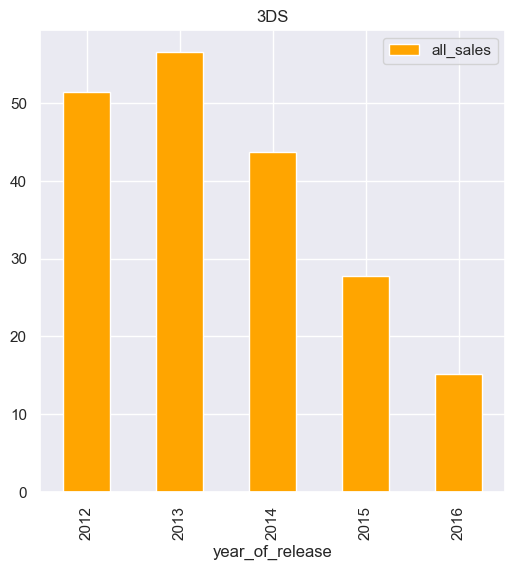

In [28]:
#3DS:
ds3_sales = actual_data_sorted.loc[actual_data_sorted.loc[ :,'platform'] =='3DS'].sort_values(by='year_of_release', ascending=False) 
print('3DS')
print()
print(ds3_sales.head(10))
print()

ds3_sales_total = ds3_sales.groupby(['year_of_release'])[['all_sales']].agg('sum')
print('3DS:')
print(ds3_sales_total.head())

ds3_sales_total.plot(title='3DS', kind='bar', color='orange', grid=True, figsize=(6, 6), legend=True)
plt.show()



У Nintendo 3DS более равномерное распределение продаж за последние 5 лет. Небольшой рост с 2012 по 2013 годы, далее - пусть и плавное, но снижение.

WiiU

      platform  year_of_release  all_sales
16652     WiiU             2016       0.01
6916      WiiU             2016       0.24
10847     WiiU             2016       0.10
5376      WiiU             2016       0.34
2973      WiiU             2016       0.67
8943      WiiU             2016       0.15
4636      WiiU             2016       0.42
14695     WiiU             2016       0.03
2056      WiiU             2016       1.01
2012      WiiU             2016       1.03

WiiU
                 all_sales
year_of_release           
2012                 17.56
2013                 21.65
2014                 22.03
2015                 16.35
2016                  4.60


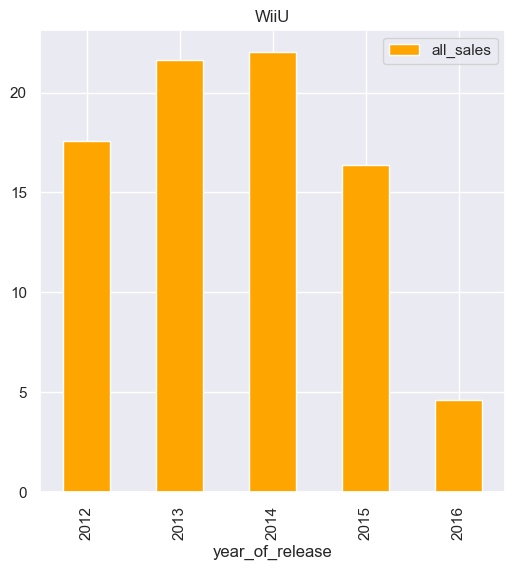

In [29]:
#WiiU:
wiiu_sales = actual_data_sorted.loc[actual_data_sorted.loc[ :,'platform'] =='WiiU'].sort_values(by='year_of_release', ascending=False) 
print('WiiU')
print()
print(wiiu_sales.head(10))
print()

wiiu_sales_total = wiiu_sales.groupby(['year_of_release'])[['all_sales']].agg('sum')
print('WiiU')
print(wiiu_sales_total.head())

wiiu_sales_total.plot(title='WiiU', kind='bar', color='orange', grid=True, figsize=(6, 6), legend=True)
plt.show()



У Nintendo WiiU были очень неплохие показатели за последние 5 лет, но в 2016 году продажи существенно снизились.

PSP

      platform  year_of_release  all_sales
16069      PSP             2015       0.02
15996      PSP             2015       0.02
11486      PSP             2015       0.08
16129      PSP             2014       0.01
16612      PSP             2014       0.01
15508      PSP             2014       0.02
16313      PSP             2014       0.01
13451      PSP             2014       0.05
15026      PSP             2014       0.02
16603      PSP             2014       0.01

PSP
                 all_sales
year_of_release           
2012                  7.81
2013                  3.14
2014                  0.24
2015                  0.12


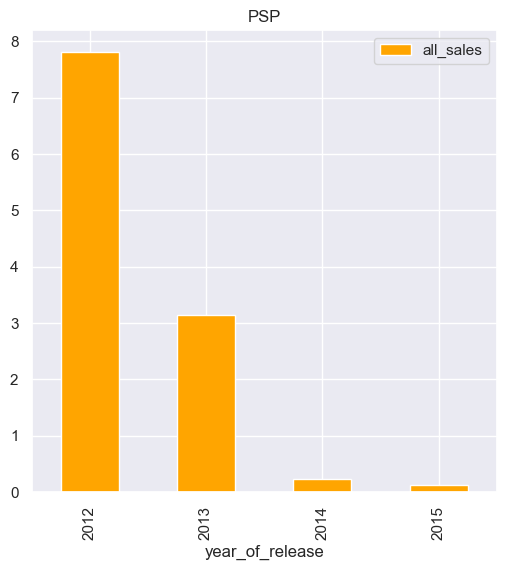

In [30]:
#PSP:
psp_sales = actual_data_sorted.loc[actual_data_sorted.loc[ :,'platform'] =='PSP'].sort_values(by='year_of_release', ascending=False) 
print('PSP')
print()
print(psp_sales.head(10))
print()

psp_sales_total = psp_sales.groupby(['year_of_release'])[['all_sales']].agg('sum')
print('PSP')
print(psp_sales_total.head())

psp_sales_total.plot(title='PSP', kind='bar', color='orange', grid=True, figsize=(6, 6), legend=True)
plt.show()



Объем продаж игр на PSP был значительно меньше, чем на разные консоли Nintendo (DS, 3DS, Wii и другие).
<br>
И снова мы видим существенный спад продаж после 2012 года. <br>
В 2014 и 2015 продажи почти полностью сократились, а за 2016 год вообще нет информации.


X360

      platform  year_of_release  all_sales
15142     X360             2016       0.02
8265      X360             2016       0.18
10371     X360             2016       0.10
14356     X360             2016       0.03
9806      X360             2016       0.12
9861      X360             2016       0.12
5689      X360             2016       0.32
14098     X360             2016       0.03
11081     X360             2016       0.10
14090     X360             2016       0.04

X360
                 all_sales
year_of_release           
2012                 99.81
2013                 88.58
2014                 34.74
2015                 11.96
2016                  1.52


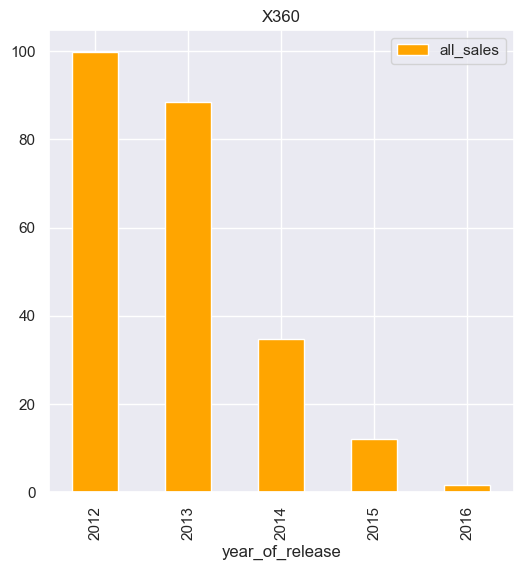

In [31]:
#X360:
x360_sales = actual_data_sorted.loc[actual_data_sorted.loc[ :,'platform'] =='X360'].sort_values(by='year_of_release', ascending=False) 
print('X360')
print()
print(x360_sales.head(10))
print()

x360_sales_total = x360_sales.groupby(['year_of_release'])[['all_sales']].agg('sum')
print('X360')
print(x360_sales_total.head())

x360_sales_total.plot(title='X360', kind='bar', color='orange', grid=True, figsize=(6, 6), legend=True)
plt.show()



У платформы Xbox 360 пока что самые большие объемы продаж из исследованных нами платформ. <br>
И вновь очевидно, как после плодотворных 2012-2013 лет пошло резкое падение, а к 2016 году объем продаж сократился по сравнению с 2012 годом почти в 100 раз.


PSV

      platform  year_of_release  all_sales
16714      PSV             2016       0.01
15840      PSV             2016       0.02
9722       PSV             2016       0.12
14798      PSV             2016       0.03
9658       PSV             2016       0.12
14872      PSV             2016       0.03
14692      PSV             2016       0.03
14700      PSV             2016       0.03
9350       PSV             2016       0.13
14707      PSV             2016       0.03

PSV
                 all_sales
year_of_release           
2012                 16.19
2013                 10.59
2014                 11.90
2015                  6.25
2016                  4.25


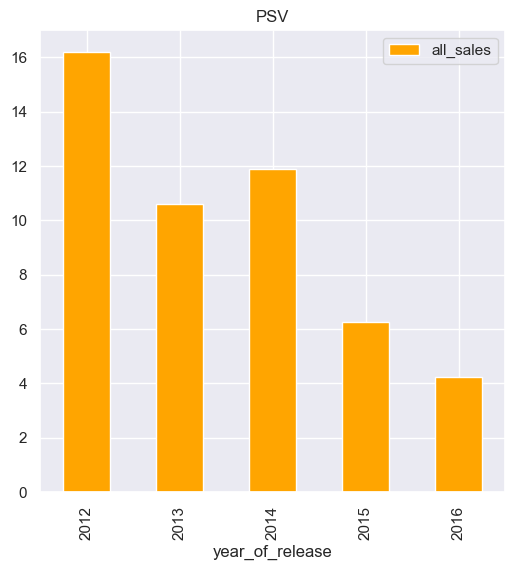

In [32]:
#PS Vita:
psv_sales = actual_data_sorted.loc[actual_data_sorted.loc[ :,'platform'] =='PSV'].sort_values(by='year_of_release', ascending=False) 
print('PSV')
print()
print(psv_sales.head(10))
print()

psv_sales_total = psv_sales.groupby(['year_of_release'])[['all_sales']].agg('sum')
print('PSV')
print(psv_sales_total.head())

psv_sales_total.plot(title='PSV', kind='bar',color='orange', grid=True, figsize=(6, 6), legend=True)
plt.show()



Платформа PS Vita показывала неплохую динамику в 2012-2014 годах, но 2015-2016 принесли существенное сокращение объемов.

Xbox One

      platform  year_of_release  all_sales
16544     XOne             2016       0.01
1948      XOne             2016       1.06
11626     XOne             2016       0.08
11629     XOne             2016       0.08
3606      XOne             2016       0.56
12635     XOne             2016       0.06
3508      XOne             2016       0.57
12537     XOne             2016       0.06
12399     XOne             2016       0.06
3250      XOne             2016       0.62

Xbox One
                 all_sales
year_of_release           
2013                 18.96
2014                 54.07
2015                 60.14
2016                 26.15


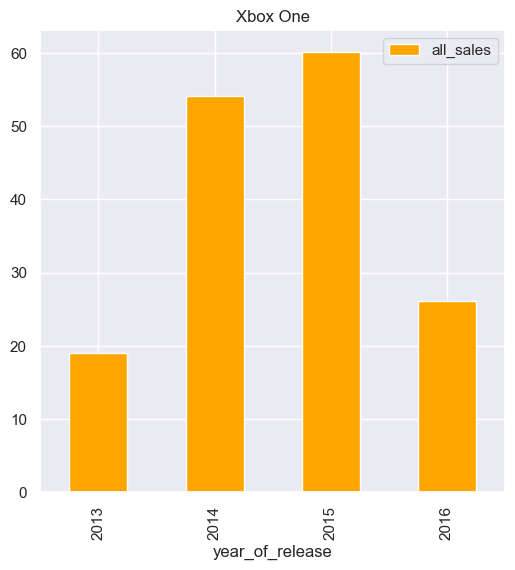

In [33]:
#Xbox One:
xone_sales = actual_data_sorted.loc[actual_data_sorted.loc[ :,'platform'] =='XOne'].sort_values(by='year_of_release', ascending=False) 
print('Xbox One')
print()
print(xone_sales.head(10))
print()

xone_sales_total = xone_sales.groupby(['year_of_release'])[['all_sales']].agg('sum')
print('Xbox One')
print(xone_sales_total.head())

xone_sales_total.plot(title='Xbox One', kind='bar', color='orange', grid=True, figsize=(6, 6), legend=True)
plt.show()


У Xbox One продажи показывали рост с 2013 по 2015 годы. В 2016 заметно снижение. <br>
Есть подозрение, что <b>данные о продажах за 2016 год неполные </b> для всех платформ. <br>
Так как даже на примере новой консоли, Xbox One, мы видим внезапное падение продаж именно в 2016-м. <br>
И в целом, за все проанализированные нами графики, ни у одной платформы не было роста в 2016-м. 

PS4

      platform  year_of_release  all_sales
16585      PS4             2016       0.01
12836      PS4             2016       0.06
12761      PS4             2016       0.06
4676       PS4             2016       0.42
4768       PS4             2016       0.40
4913       PS4             2016       0.40
11583      PS4             2016       0.07
4786       PS4             2016       0.39
5008       PS4             2016       0.38
4943       PS4             2016       0.38

PS4
                 all_sales
year_of_release           
2013                 25.99
2014                100.00
2015                118.90
2016                 69.25


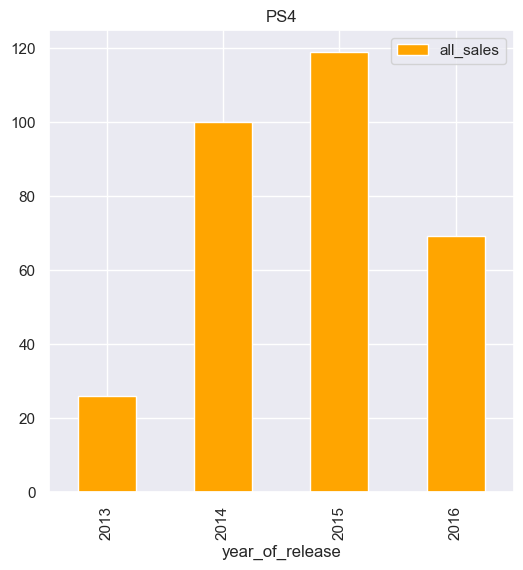

In [34]:
#PS4:
ps4_sales = actual_data_sorted.loc[actual_data_sorted.loc[ :,'platform'] =='PS4'].sort_values(by='year_of_release', ascending=False) 
print('PS4')
print()
print(ps4_sales.head(10))
print()

ps4_sales_total = ps4_sales.groupby(['year_of_release'])[['all_sales']].agg('sum')
print('PS4')
print(ps4_sales_total.head())

ps4_sales_total.plot(title='PS4', kind='bar', color='orange', grid=True, figsize=(6, 6), legend=True)
plt.show()

Безусловным рекордсменом по продажам в 2014-2015 годах является PlayStation 4, запущенная в 2013-м. Платформа показывает уверенный рост. <br>
И снова мы видим необъяснимое снижение объемов продаж игр в 2016, и я все больше убеждаюсь, что это связано с неполными данными о продажах за последний год.

#### Вывод

Предположим, что данные за 2016 год неполные, тогда сравним данные за 2015 по объемам продаж топ-3 платформ: PS4, Xbox One и Nintendo 3DS.

**Топ-3 растущих по объему продаж платформ:**

1. PS4 - 118.90
2. Xbox One - 60.14
3. Nintendo 3DS - 27.78

**Топ-3 платформ-лидеров падения продаж:** <br>
1. PS Vita - 6.25
2. Xbox 360 - 11.96
3. Nintendo WiiU - 16.35

*PSP - 0.12 (не берем в расчет, так как это уже изжившая себя платформа)

Потенциально прибыльными платформами для нас являются:
    
1. PS4
2. Xbox One
3. Nintendo 3DS
4. PC - ПК взять вынуждены тоже, несмотря на не слишком высокие объемы продаж.

### Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
Начнем с группировки таблицы с необходимыми нам данными - по платформам и общим продажам. <br>
Для проверки наших будущих ящиков с усами выведем также данные общих сумм продаж выбранных нами 11 платформ, и сколько заработала каждая платформа.

In [35]:
actual_data_sales = actual_data_sorted.groupby(['platform'])[['all_sales']].agg('sum').sort_values(by='all_sales', ascending=False) 
print(actual_data_sales)
print()
print('Общая сумма продаж выбранных платформ:', actual_data_sales['all_sales'].sum().round(2))

          all_sales
platform           
PS4          314.14
PS3          288.91
X360         236.61
3DS          194.64
XOne         159.32
WiiU          82.19
PC            63.45
PSV           49.18
Wii           35.39
DS            12.61
PSP           11.31

Общая сумма продаж выбранных платформ: 1447.75


In [36]:
#Собираем табличку для построения "ящиков с усами" из предыдущих созданных нами таблиц:
fin_table = pc_sales_total.merge(wii_sales_total, on='year_of_release', how='left', suffixes=('_pc', '_wii'))
fin_table['all_sales_ds'] = ds_sales_total['all_sales']
fin_table['all_sales_ps3'] = ps_3_sales_total['all_sales']
fin_table['all_sales_ds3'] = ds3_sales_total['all_sales']
fin_table['all_sales_wiiu'] = wiiu_sales_total['all_sales']
fin_table['all_sales_psp'] = psp_sales_total['all_sales']
fin_table['all_sales_x360'] = x360_sales_total['all_sales']
fin_table['all_sales_psv'] = psv_sales_total['all_sales']
fin_table['all_sales_xone'] = xone_sales_total['all_sales']
fin_table['all_sales_ps4'] = ps4_sales_total['all_sales']
fin_table = fin_table.fillna(value=0)
fin_table.head(10)

,all_sales_pc,all_sales_wii,all_sales_ds,all_sales_ps3,all_sales_ds3,all_sales_wiiu,all_sales_psp,all_sales_x360,all_sales_psv,all_sales_xone,all_sales_ps4
year_of_release,,,,,,,,,,,
2012,23.23,21.73,11.07,107.43,51.39,17.56,7.81,99.81,16.19,0.00,0.00
2013,13.12,8.59,1.54,113.30,56.57,21.65,3.14,88.58,10.59,18.96,25.99
2014,13.28,3.75,0.00,47.76,43.76,22.03,0.24,34.74,11.90,54.07,100.00
2015,8.53,1.14,0.00,16.82,27.78,16.35,0.12,11.96,6.25,60.14,118.90
2016,5.29,0.18,0.00,3.60,15.14,4.60,0.00,1.52,4.25,26.15,69.25


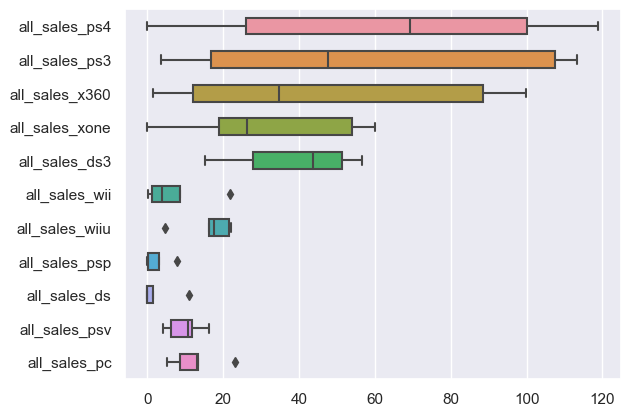

In [37]:
#Строим "ящик с усами" с помощью библиотеки Seaborn, глобальные продажи в разбивке по платформам:
sns.boxplot(width=0.5, orient="h", data=fin_table[["all_sales_ps4", "all_sales_ps3", "all_sales_x360", "all_sales_xone", "all_sales_ds3", "all_sales_wii", "all_sales_wiiu", "all_sales_psp", "all_sales_ds", "all_sales_psv", "all_sales_pc"]])
sns.set(rc={'figure.figsize':(20,10)})
plt.show()


<b>Наблюдения:</b><br>
* Очень наглядна разница в продажах по платформам. <br>
* Любопытно, как у первой четверки платформ: PS4 PS3, X360, XOne разбросаны min и max значения продаж.<br>
* Почти у всех платформ существенно смещена медиана. Причем у PS4 она смещена к верхнему (правому в нашем случае) квартилю, т.е. к 75%, а у PS3, X360, XOne - к нижнему (25%).
* У платформ Wiiu, PSP, DS, PC присутствуют выбросы.





### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
<br><br>
Соберем заново табличку с <b>актуальными данными</b> для платформы с наивысшими показателями продаж - <b>PS4</b> - добавив столбцы 'critic_score' и 'user_score'. <br>

Не забудем убрать строки с рабочим значением <b> -1</b> в столбцах 'critic_score' и 'user_score', чтобы не портило нам диаграмму рассеяния и корреляцию.

In [38]:
actual_data_sorted_ps4 = actual_data[['platform', 'year_of_release', 'all_sales', 'critic_score', 'user_score']] 
actual_data_sorted_ps4 = actual_data_sorted_ps4.loc[actual_data_sorted_ps4.loc[ :,'platform'] == 'PS4'].sort_values(by='all_sales', ascending=False) 

# Удалим из выборки PS4 строки с рабочим значением <b> -1</b> в столбце 'critic_score':
actual_data_sorted_ps4_critic = actual_data_sorted_ps4.loc[actual_data_sorted_ps4.loc[ :,'critic_score'] != -1] 
actual_data_sorted_ps4_user = actual_data_sorted_ps4.loc[actual_data_sorted_ps4.loc[ :,'user_score'] != -1]

# Удалим из выборки PS4 строки с рабочим значением <b> -1</b> в столбце 'user_score':

print('Всего строк PS4:', actual_data_sorted_ps4['platform'].count())
print('Всего строк после удаления -1 в critic_score:', actual_data_sorted_ps4_critic['platform'].count())
print('Всего строк после удаления -1 в user_score:', actual_data_sorted_ps4_user['platform'].count())


Всего строк PS4: 392
Всего строк после удаления -1 в critic_score: 252
Всего строк после удаления -1 в user_score: 257


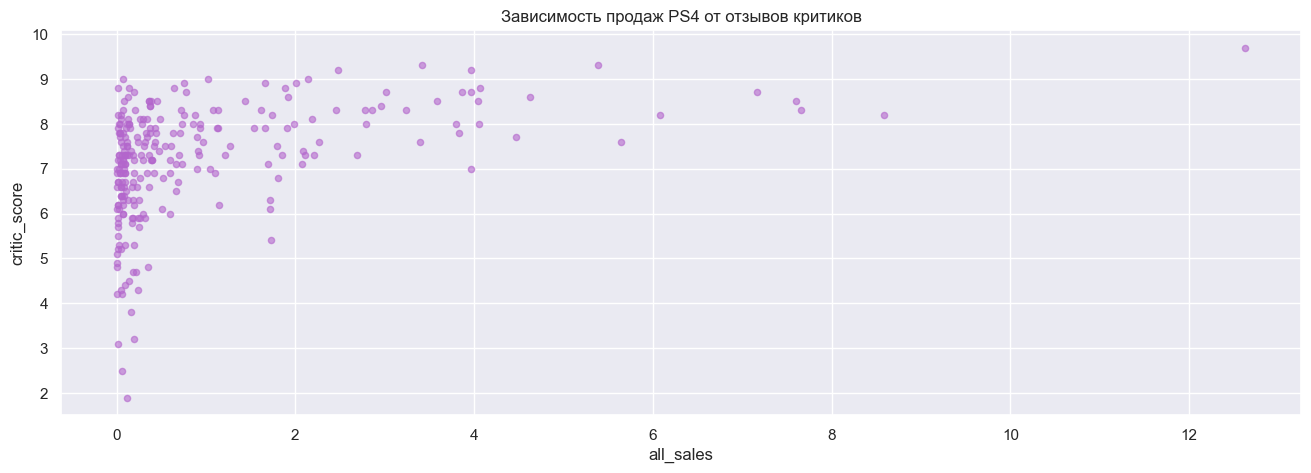

Коэффициент корреляции продаж PS4 и отзывов критиков: 0.41



In [39]:
#Построим диаграмму рассеяния и посчитаем корреляцию между all_sales и critic_score для PS4:
actual_data_sorted_ps4_critic.plot(title='Зависимость продаж PS4 от отзывов критиков', c=np.array([0.7, 0.4, 0.8]).reshape(1,-1), y='critic_score', x='all_sales', kind='scatter', grid=True, figsize=(16, 5), alpha=0.6)
plt.show()

print('Коэффициент корреляции продаж PS4 и отзывов критиков:', actual_data_sorted_ps4_critic['critic_score'].corr(actual_data_sorted_ps4_critic['all_sales']).round(2))
print()

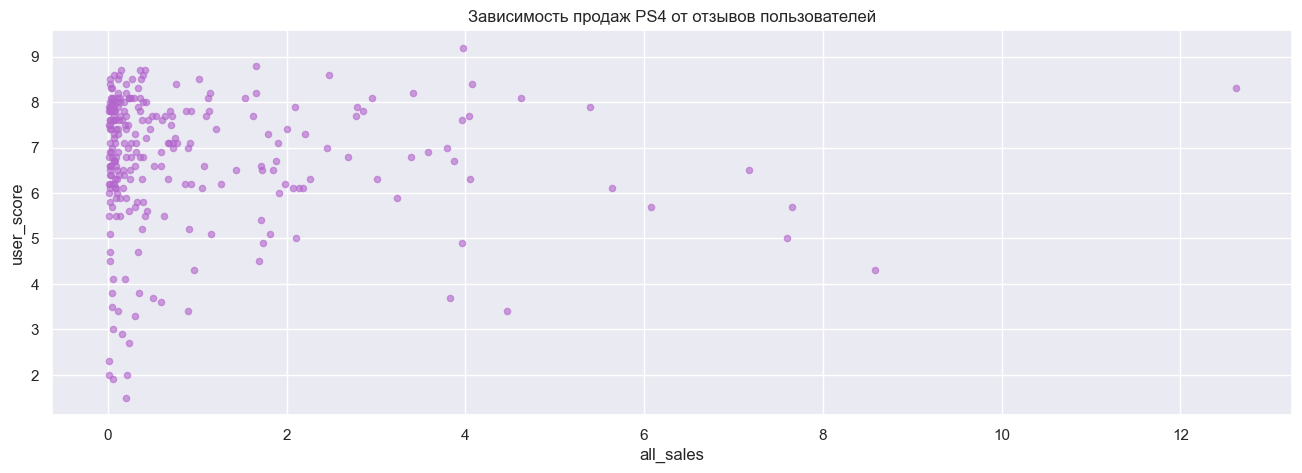

Коэффициент корреляции продаж PS4 и отзывов пользователей: -0.03



In [40]:
#Построим диаграмму рассеяния и посчитаем корреляцию между all_sales и user_score для PS4:
actual_data_sorted_ps4_user.plot(title='Зависимость продаж PS4 от отзывов пользователей', c=np.array([0.7, 0.4, 0.8]).reshape(1,-1), y='user_score', x='all_sales', kind='scatter', grid=True, figsize=(16, 5), alpha=0.6)
plt.show()

print('Коэффициент корреляции продаж PS4 и отзывов пользователей:', actual_data_sorted_ps4_user['user_score'].corr(actual_data_sorted_ps4_user['all_sales']).round(2))
print()

<b>Наблюдения зависимости продаж PS4</b><br>
Мы можем проанализировать зависимость продаж PS4 от:
<ul>
<li> отзывов критиков - положительная корреляция (чем выше отзывы, тем выше пролажи). Коэффициент корреляции составил 0.41, что говорит о наличии связи, пусть и слабой.</li>
<li> отзывов пользователей - трудно говорить о корреляции, коэффициент составил -0.03 - я бы сказала что, взаимосвязь почти отсутствует, но коэффициент показывает крайне слабый минус, то есть имеет место едва ощутимая отрицательная взаимосвязь. </li>
</ul>    

### Соотнесите выводы с продажами игр на других платформах

Для чистоты эксперимента я проделаю то же самое с данными для другой платформы - Xbox 360. 
Возьму выборку и построю диаграмму рассеяния, а также посчитаю корреляцию между all_sales и critic_score и между all_sales и user_score, чтобы убедиться, что у PS4 не уникальная ситуация, и тогда смогу сделать выводы для игр на других платформах:

In [41]:
actual_data_sorted_x360 = actual_data[['platform', 'year_of_release', 'all_sales', 'critic_score', 'user_score']] 
actual_data_sorted_x360 = actual_data_sorted_x360.loc[actual_data_sorted_x360.loc[ :,'platform'] == 'X360'].sort_values(by='all_sales', ascending=False) 

# Удалим из выборки X360 строки с рабочим значением <b> -1</b> в столбце 'critic_score':
actual_data_sorted_x360_critic = actual_data_sorted_x360.loc[actual_data_sorted_x360.loc[ :,'critic_score'] != -1] 
actual_data_sorted_x360_user = actual_data_sorted_x360.loc[actual_data_sorted_x360.loc[ :,'user_score'] != -1]

# Удалим из выборки X360 строки с рабочим значением <b> -1</b> в столбце 'user_score':

print('Всего строк X360:', actual_data_sorted_x360['platform'].count())
print('Всего строк после удаления -1 в critic_score:', actual_data_sorted_x360_critic['platform'].count())
print('Всего строк после удаления -1 в user_score:', actual_data_sorted_x360_user['platform'].count())


Всего строк X360: 293
Всего строк после удаления -1 в critic_score: 172
Всего строк после удаления -1 в user_score: 236


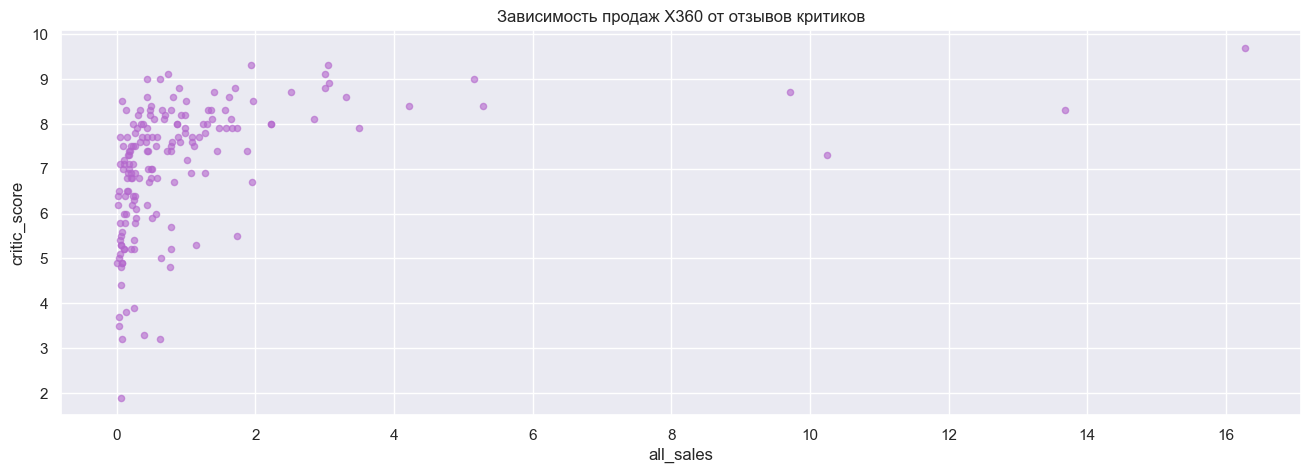

Коэффициент корреляции продаж X360 и отзывов критиков: 0.36



In [42]:
#Построим диаграмму рассеяния и посчитаем корреляцию между all_sales и critic_score для X360:
actual_data_sorted_x360_critic.plot(title='Зависимость продаж X360 от отзывов критиков', c=np.array([0.7, 0.4, 0.8]).reshape(1,-1), y='critic_score', x='all_sales', kind='scatter', grid=True, figsize=(16, 5), alpha=0.6)
plt.show()

print('Коэффициент корреляции продаж X360 и отзывов критиков:', actual_data_sorted_x360_critic['critic_score'].corr(actual_data_sorted_x360_critic['all_sales']).round(2))
print()

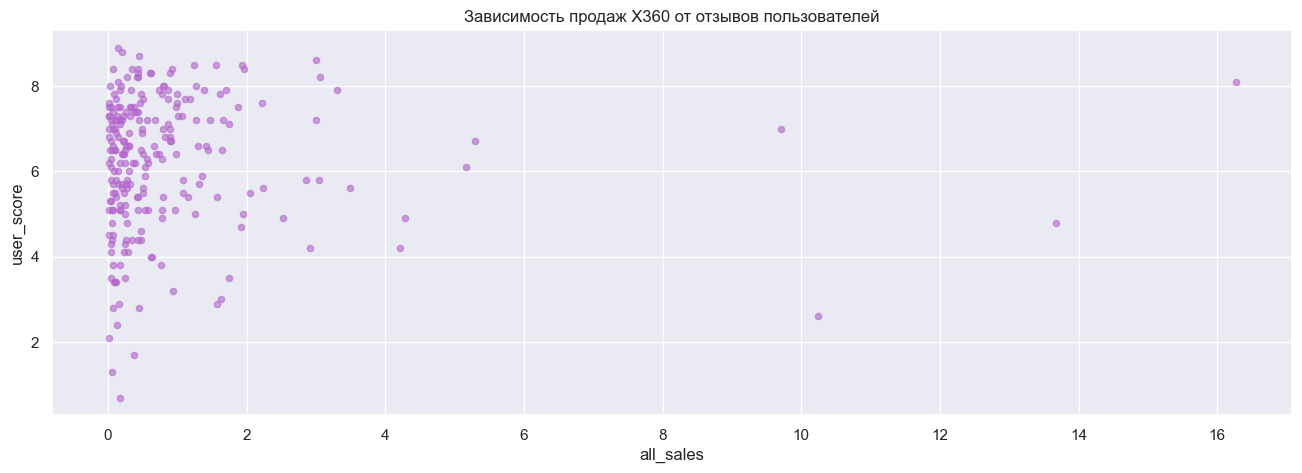

Коэффициент корреляции продаж X360 и отзывов пользователей: 0.01



In [43]:
#Построим диаграмму рассеяния и посчитаем корреляцию между all_sales и user_score для X360:
actual_data_sorted_x360_user.plot(title='Зависимость продаж X360 от отзывов пользователей', c=np.array([0.7, 0.4, 0.8]).reshape(1,-1), y='user_score', x='all_sales', kind='scatter', grid=True, figsize=(16, 5), alpha=0.6)
plt.show()

print('Коэффициент корреляции продаж X360 и отзывов пользователей:', actual_data_sorted_x360_user['user_score'].corr(actual_data_sorted_x360_user['all_sales']).round(2))
print()

<b>Наблюдения зависимости продаж Xbox 360</b><br>
Мы можем проанализировать зависимость продаж Xbox 360 от:
<ul>
<li> отзывов критиков - положительная корреляция. Коэффициент корреляции составил 0.36, что говорит о наличии связи, пусть и слабой.</li>
<li> отзывов пользователей - трудно говорить о корреляции, коэффициент составил 0.01 - взаимосвязь отсутствует.</li>
</ul>    

#### Общий вывод по продажам на платформах:

* Итак, для всех платформ характерна слабая положительная зависимость от отзывов критиков - чем выше оценка, тем лучше продажи.
<br>
* Удивительно, но отзывы пользователей по результатам нашего исследования не показали взаимосвязь, т.е. оценка игроков не влияет на продажи.
<br>
* Средний объем продаж по медиане (median) составляет 82.19, при этом среднее арифметическое (mean) почти в два раза превышает медиану (131.61). <br>
* Разница в выборке из 11 платформ между min и max значениями продаж - почти в 30 раз. <br>
* Продажи топ-3 платформ, PS4, PS3 и Xbox One, составляют <b> больше половины (58%) всех продаж </b> выбранных 11 платформ (839.66 от 1447.75).

### Посмотрите на общее распределение игр по жанрам. 

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Итак, с 2012 года у нас 11 платформ.  <br>
Снова создадим таблицу под наши нужды, оставив только нужные нам столбцы: platform, genre и all_sales.

In [44]:
#Соберем таблицу и проверим, что все работает:
actual_data_sorted_genre = actual_data[['platform', 'genre', 'all_sales']].sort_values(by='all_sales', ascending=False) 
print(actual_data_sorted_genre.head(20))
print()


   platform         genre  all_sales
16      PS3        Action      21.05
23     X360        Action      16.27
31      PS4       Shooter      14.63
33      3DS  Role-Playing      14.60
34      PS3       Shooter      13.79
35     X360       Shooter      13.68
42      PS4        Action      12.62
47      3DS  Role-Playing      11.68
60     X360       Shooter      10.24
62      3DS      Platform       9.90
66     X360       Shooter       9.71
69      PS3       Shooter       9.36
72     X360          Misc       9.18
73      3DS    Simulation       9.17
77      PS4        Sports       8.58
81      PS3        Action       8.17
83       DS  Role-Playing       8.06
87      PS4       Shooter       7.98
92      PS4       Shooter       7.66
94      PS4        Sports       7.60



Чреез sum() найдем суммы продаж по нашим 11 платформам по жанрам, найдем самые продаваемые. <br>
Через count() узнаем, сколько вообще выходило игр с 2012 по 2016 в разных жанрах. <br>
Затем построим графики суммарных продаж по жанрам и количества игр по жанрам.

              all_sales
genre                  
Action            441.8
Shooter           304.7
Role-Playing      192.9
Sports            181.1
Misc               85.2
Platform           61.0
Racing             53.5
Fighting           44.5
Simulation         35.3
Adventure          29.4
Strategy           13.5
Puzzle              5.0

              platform
genre                 
Action            1034
Role-Playing       372
Adventure          302
Sports             268
Shooter            236
Misc               193
Racing             115
Fighting           109
Platform            85
Simulation          83
Strategy            74
Puzzle              29



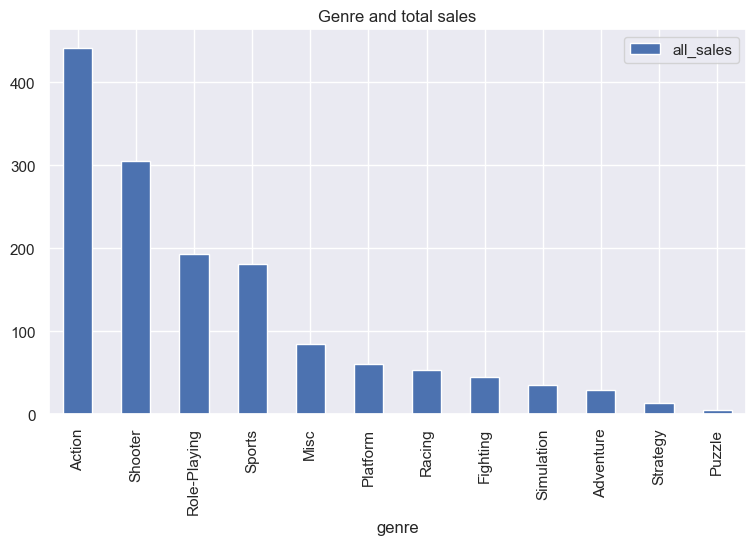

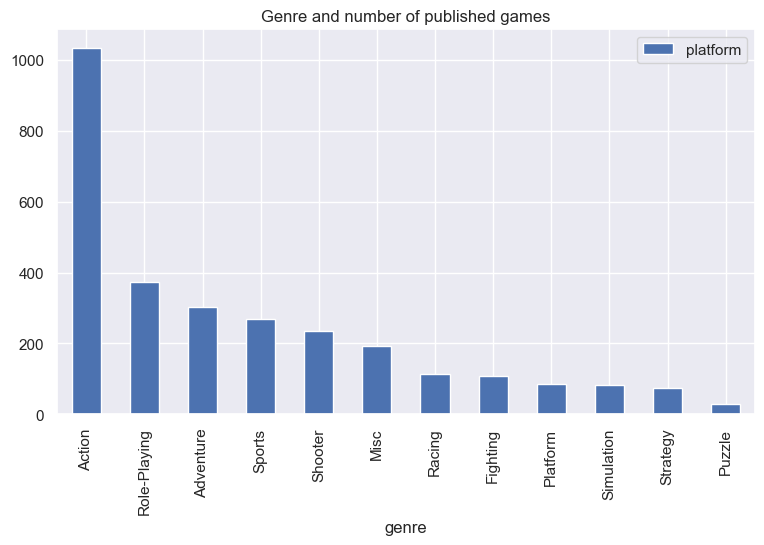

In [45]:
#Посчитаем суммы продаж по нашим 11 платформам по жанрам, найдем самые продаваемые:
actual_data_sorted_genre_total = actual_data_sorted_genre.groupby(['genre'])[['all_sales']].agg('sum').round(1).sort_values(by='all_sales', ascending=False)
print(actual_data_sorted_genre_total)
print()

#Посчитаем, сколько вообще выходило игр с 2012 по 2016 в разных жанрах:
actual_data_sorted_genre_count = actual_data_sorted_genre.groupby(['genre'])[['platform']].agg('count').sort_values(by='platform', ascending=False)
print(actual_data_sorted_genre_count)
print()

#Построим график по нашей таблице суммарных продаж по жанрам:
actual_data_sorted_genre_total.plot(title='Genre and total sales', kind='bar', grid=True, figsize=(9, 5), legend=True)
plt.show()

#Построим график количества игр по жанрам:
actual_data_sorted_genre_count.plot(title='Genre and number of published games', kind='bar', grid=True, figsize=(9, 5), legend=True)
plt.show()


#### А теперь узнаем медианные значения продаж по разным жанрам. 
Так мы сможем определить, какой жанр в самом деле приносит больше прибыли за игру.


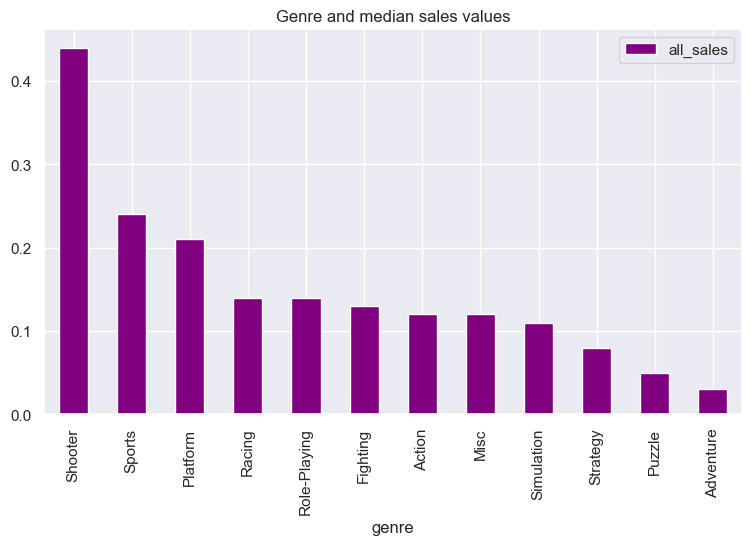

           genre  all_sales
8        Shooter       0.44
10        Sports       0.24
4       Platform       0.21
6         Racing       0.14
7   Role-Playing       0.14
2       Fighting       0.13
0         Action       0.12
3           Misc       0.12
9     Simulation       0.11
11      Strategy       0.08
5         Puzzle       0.05
1      Adventure       0.03


In [46]:
actual_data_sorted_genre_median = actual_data_sorted_genre.groupby(['genre'])[['all_sales']].median().round(2).reset_index().sort_values(by='all_sales', ascending=False)    
actual_data_sorted_genre_median.plot(title='Genre and median sales values', x='genre', y='all_sales', kind='bar', color='purple', figsize=(9,5), legend=True)
plt.show()

print(actual_data_sorted_genre_median.head(20))

И хотя, на первый взгляд, по суммам продаж лидировал жанр Action, на деле оказалось, что **больше всего прибыли приносит жанр Shooter.**
По всей видимости, высокая сумма продаж игр жанра Action действительно обусловлена их большим количеством.

**Итак, топ-3 жанров по прибыльности:**
* Shooter
* Sports
* Platform


**Меньше всего прибыли приносят следующие жанры:**
* Adventure
* Puzzle
* Strategy

#### Вывод

1. Что можно сказать о самых прибыльных жанрах? 
2. Выделяются ли жанры с высокими и низкими продажами?

<b>Самые прибыльные жанры: </b> <br>
1. Action - 30% всех продаж
2. Shooter - 21% всех продаж
3. RPG - 13% всех продаж
<br>

Т.е. в сумме топ-3 прибыльных жанров составляют 64% всех продаж, а всего жанров у нас 12.
<br><br>
При этом любопытно распределение по количеству выпущенных игр.<br> 
На 1 месте тот же жанр Action, а вот RPG по количеству игр на 2-м, а по продажам - на 3-м.<br> <br>
И самое удивительное, жанр Shooter - 5-е место по количеству изданных игр и 2-е по продажам. <br>
Игр жанра Shooter выпускают <b> в 4 раза меньше </b>, чем Action, но по объему продаж Shooter уступает Action всего на 30%.

<br>
<b>Самые низкие продажи у игр следующих жанров:</b> <br>
1. Puzzle - 2% всех продаж <br>
2. Strategy - 5.1% всех продаж <br> 
3. Simulation - 5.3% всех продаж
<br><br>
Здесь количество изданных игр жанров Puzzle, Strategy, Simulation соответствует прибыльности от них.

## Портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):
1.	Самые популярные платформы (топ-5). Описать различия в долях продаж.
2.	Самые популярные жанры (топ-5). Пояснить разницу.
3.	Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [47]:
#Соберем таблицу и проверим, что все работает:
actual_data_sorted_regions = actual_data[['platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'rating']].sort_values(by='platform', ascending=False) 
actual_data_sorted_regions.head(20)


,platform,genre,na_sales,eu_sales,jp_sales,other_sales,rating
4274,XOne,Misc,0.30,0.11,0.00,0.04,E10+
3309,XOne,Action,0.35,0.21,0.00,0.05,Unknown
5388,XOne,Platform,0.13,0.18,0.00,0.03,E10+
3606,XOne,Action,0.30,0.20,0.01,0.05,M
8012,XOne,Misc,0.08,0.09,0.00,0.01,E
8206,XOne,Misc,0.11,0.05,0.00,0.02,E10+
10821,XOne,Platform,0.05,0.04,0.00,0.01,E10+
16264,XOne,Action,0.01,0.00,0.00,0.00,E10+
5321,XOne,Shooter,0.20,0.11,0.00,0.03,M
13966,XOne,Action,0.01,0.03,0.00,0.00,Unknown


### Самые популярные платформы (топ-5). 
Определить для пользователя каждого региона (NA, EU, JP).
Описать различия в долях продаж.

#### Регион NA (North America):

In [48]:
actual_data_sorted_region_na = actual_data_sorted_regions.groupby(['platform'])[['na_sales']].agg('sum').round(1).sort_values(by='na_sales', ascending=False) 
print(actual_data_sorted_region_na)
print()
print('Продажи в регионе North America, всего:', actual_data_sorted_region_na['na_sales'].sum().round(1))

          na_sales
platform          
X360         140.1
PS4          108.7
PS3          103.4
XOne          93.1
3DS           55.3
WiiU          38.1
PC            19.3
Wii           17.5
PSV           11.0
DS             4.6
PSP            0.1

Продажи в регионе North America, всего: 591.2


<b> Самые популярные платформы в NA (North America), доля от всех продаж в регионе: </b> <br>
1. X360 - 24% 
2. PS4 - 18%
3. PS3 - 17.5%
4. XOne - 15.7%
5. 3DS - 9.3%
<br>

<b>Общая сумма продаж в NA:</b> 591.2

#### Регион EU (European Union):

In [49]:
actual_data_sorted_region_eu = actual_data_sorted_regions.groupby(['platform'])[['eu_sales']].agg('sum').round(1).sort_values(by='eu_sales', ascending=False) 
print(actual_data_sorted_region_eu)
print()
print('Продажи в регионе EU, всего:', actual_data_sorted_region_eu['eu_sales'].sum().round(1))


          eu_sales
platform          
PS4          141.1
PS3          106.9
X360          74.5
XOne          51.6
3DS           42.6
PC            38.3
WiiU          25.1
Wii           11.9
PSV           11.4
DS             3.6
PSP            0.4

Продажи в регионе EU, всего: 507.4


<b> Самые популярные платформы в EU (European Union), доля от всех продаж в регионе: </b> <br>
1. PS4 - 24%
2. PS3 - 18%
3. X360 - 12.6% 
4. XOne - 10.1%
5. 3DS - 8.4%
<br>

<b>Общая сумма продаж в EU:</b> 507.4

#### Регион JP (Japan):

In [50]:
actual_data_sorted_region_jp = actual_data_sorted_regions.groupby(['platform'])[['jp_sales']].agg('sum').round(1).sort_values(by='jp_sales', ascending=False) 
print(actual_data_sorted_region_jp)
print()
print('Продажи в регионе JP, всего:', actual_data_sorted_region_jp['jp_sales'].sum().round(1))

          jp_sales
platform          
3DS           87.8
PS3           35.3
PSV           21.0
PS4           16.0
WiiU          13.0
PSP           10.6
DS             3.7
Wii            3.4
X360           1.6
XOne           0.3
PC             0.0

Продажи в регионе JP, всего: 192.7


<b> Самые популярные платформы в JP (Japan), доля от всех продаж в регионе: </b> <br>
1. 3DS - 45.6% - почти половина (!) всех продаж у Nintendo 3DS.
2. PS3 - 18.3% 
3. PSV - 10.9%
4. PS4 - 8.3%
5. WiiU - 6.7%
<br>

<b>Общая сумма продаж в JP:</b> 192.7

#### Остальной мир:

In [51]:
actual_data_sorted_region_others = actual_data_sorted_regions.groupby(['platform'])[['other_sales']].agg('sum').round(1).sort_values(by='other_sales', ascending=False) 
print(actual_data_sorted_region_others)
print()
print('Продажи в остальном мире, всего:', actual_data_sorted_region_others['other_sales'].sum().round(1))

          other_sales
platform             
PS4              48.4
PS3              43.3
X360             20.4
XOne             14.3
3DS               8.9
WiiU              6.0
PC                5.8
PSV               5.8
Wii               2.6
DS                0.7
PSP               0.2

Продажи в остальном мире, всего: 156.4


<b> Самые популярные платформы в остальном мире, доля от всех продаж в регионе: </b> <br>
1. PS4 - 31%
2. PS3 - 27.7%
3. X360 - 13%
4. XOne - 9.1%
5. 3DS - 5.7%
<br>

<b>Общая сумма продаж в остальном мире:</b> 156.3

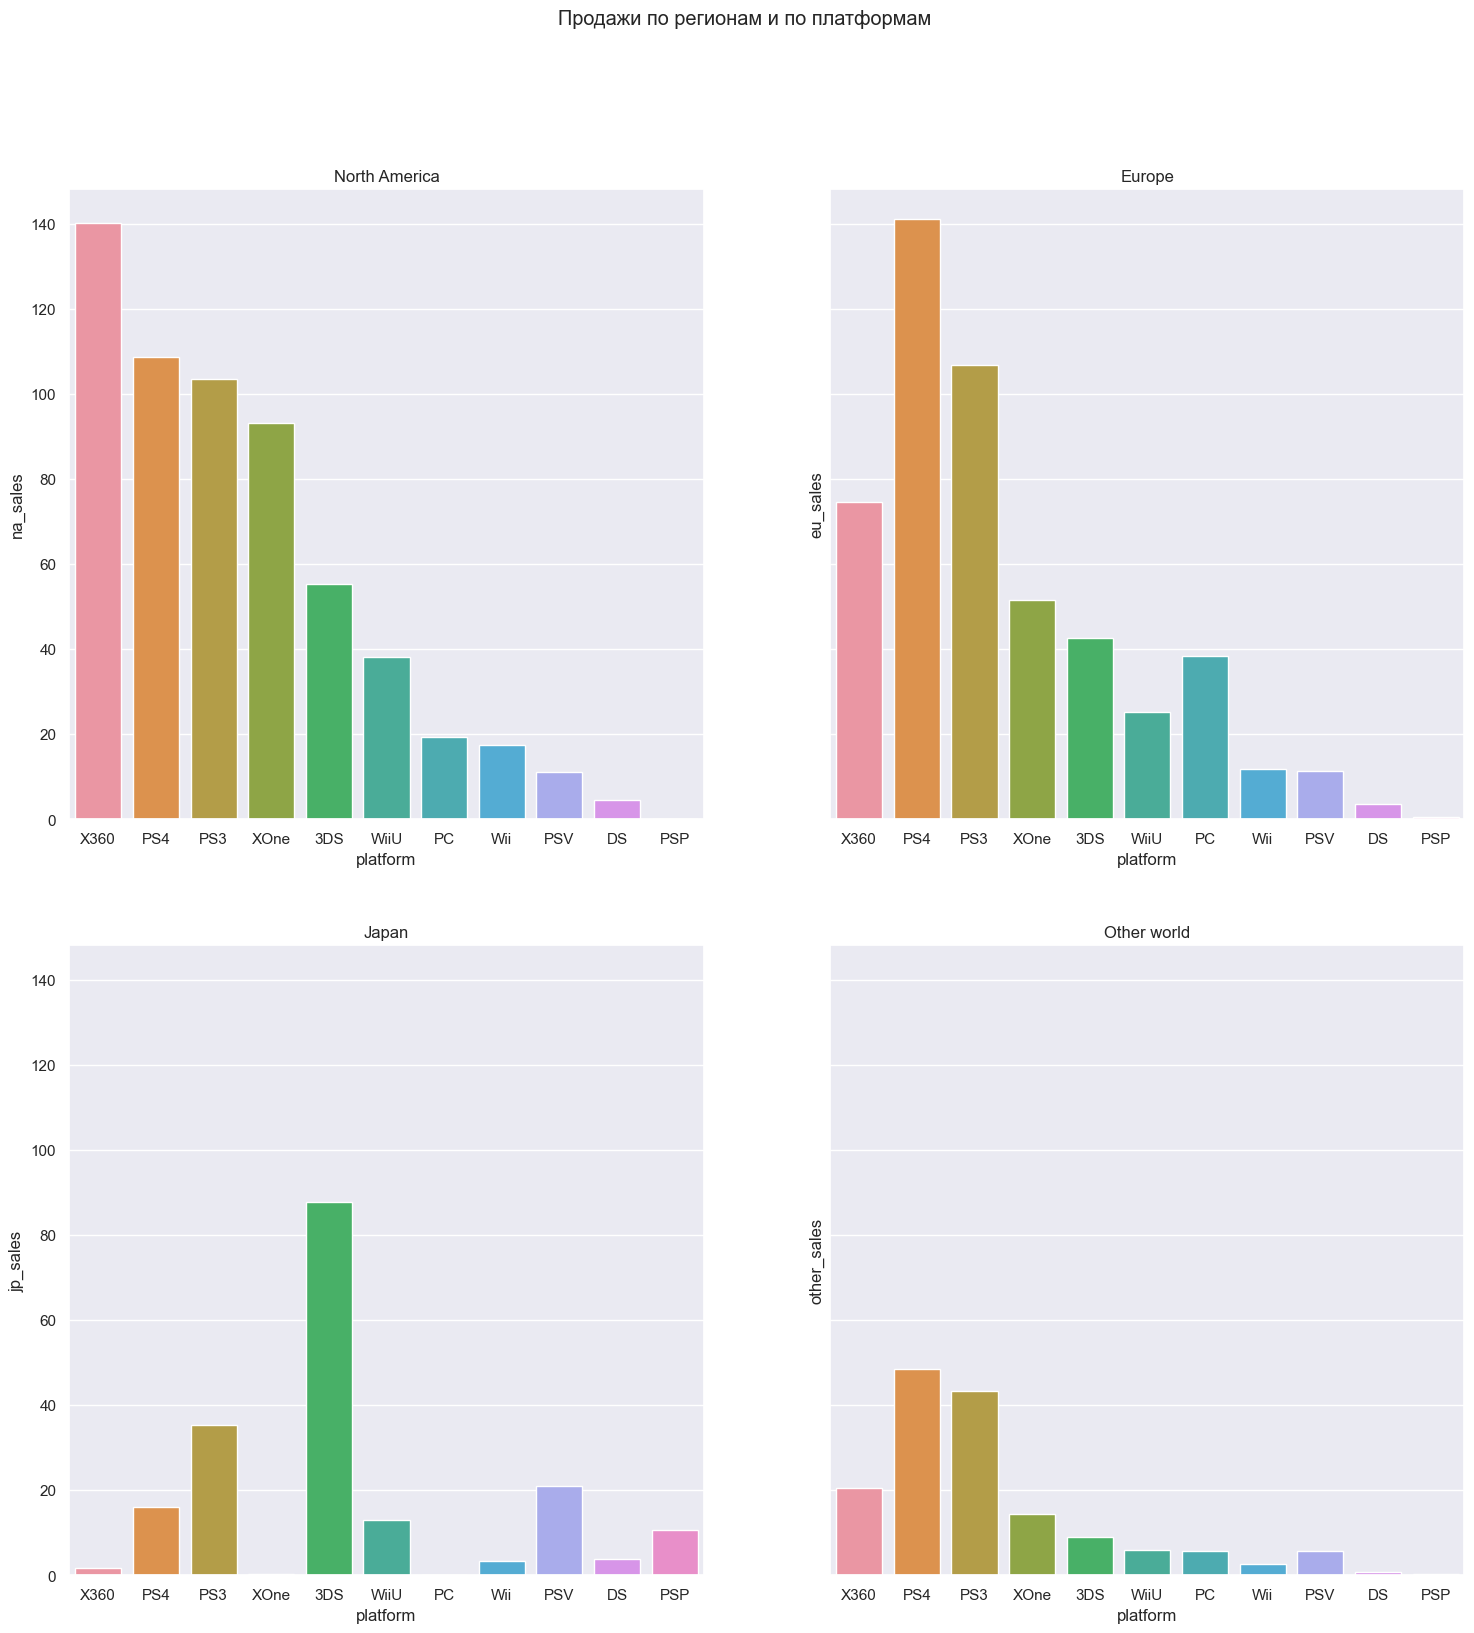

In [52]:
#Собираем табличку для построения единого блока графиков продаж по регионам:
reg_table = actual_data_sorted_region_na.merge(actual_data_sorted_region_eu, on='platform',  suffixes=('_na', '_eu'))
reg_table['jp_sales'] = actual_data_sorted_region_jp
reg_table['other_sales'] = actual_data_sorted_region_others
reg_table = reg_table.reset_index()

#Строим сетку из графиков с помощью Seaborn размером 2х2
fig, axes = plt.subplots(2, 2, figsize=(18, 18), sharey=True)
fig.suptitle('Продажи по регионам и по платформам')

sns.barplot(data=reg_table, x='platform', y='na_sales', ax=axes[0,0]).set(title='North America')
sns.barplot(data=reg_table, x='platform', y='eu_sales', ax=axes[0,1]).set(title='Europe')
sns.barplot(data=reg_table, x='platform', y='jp_sales', ax=axes[1,0]).set(title='Japan')
sns.barplot(data=reg_table, x='platform', y='other_sales', ax=axes[1,1]).set(title='Other world')

plt.show()

#### Вывод по платформам и продажам в регионах:

* В <b>NA</b> лидирует XBox 360, занимает четверть рынка региона.
* В <b>NA</b> продажи PS3 и PS4 почти одинаковы, что любопытно, так как PS3 - приставка прошлого поколения.
* В <b>JP</b> с большим отрывом побеждает Nintendo 3DS  - почти половина всех продаж в регионе.
* В <b>JP</b> в топ-5 вошли экзотические PS Vita и Nintendo WiiU.
* В <b>JP</b> любят портативные игры, а не станционарные приставки. В сумме 3DS, PSV, WiiU - это 63.2%  рынка.
* В <b>EU</b> лидирует PS4, занимая четверть рынка.
* В <b>EU</b> явно предпочитают станционарные приставки. Портативные игры в виде Nintendo 3DS занимают лишь 8%.
* Предпочтения платформ в <b>EU</b> и <b>остальном мире</b> идентичны (PS4, PS4, X360, XOne и 3DS).
* В целом в регионах <b>NA, EU, JP</b> платформа PS3 стабильно занимает примерно 18% рынка. Выше только в остальном мире - 27.7%.

### Самые популярные жанры

#### Топ-5 жанров для региона NA (North America)

Продажи по жанрам в регионе North America, всего: 591.1

              na_sales
genre                 
Action           177.9
Shooter          144.8
Sports            81.5
Role-Playing      64.0
Misc              38.2
Platform          25.4
Fighting          19.8
Racing            17.2
Adventure          8.9
Simulation         8.1
Strategy           4.2
Puzzle             1.1



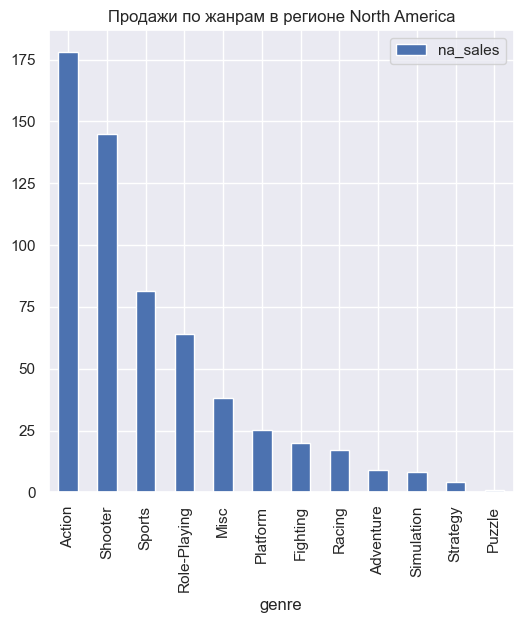

In [53]:
actual_data_sorted_genre_na = actual_data_sorted_regions.groupby(['genre'])[['na_sales']].agg('sum').round(1).sort_values(by='na_sales', ascending=False) 
print('Продажи по жанрам в регионе North America, всего:', actual_data_sorted_genre_na['na_sales'].sum().round(1))
print()
print(actual_data_sorted_genre_na)
print()

actual_data_sorted_genre_na.plot(title='Продажи по жанрам в регионе North America', kind='bar', grid=True, figsize=(6, 6), legend=True)
plt.show()

<b> Самые популярные жанры в NA (North America), доля от всех продаж в регионе: </b> <br>
1. Action - 30% 
2. Shooter - 24.5%
3. Sports - 13.8%
4. RPG - 10.8%
5. Misc - 6.5%
<br>


#### Топ-5 жанров для региона EU (European Union)

Продажи по жанрам в регионе European Union, всего: 507.5

              eu_sales
genre                 
Action           159.8
Shooter          113.5
Sports            69.1
Role-Playing      48.5
Racing            27.3
Misc              26.4
Platform          21.4
Simulation        14.6
Fighting          10.8
Adventure          9.5
Strategy           5.2
Puzzle             1.4



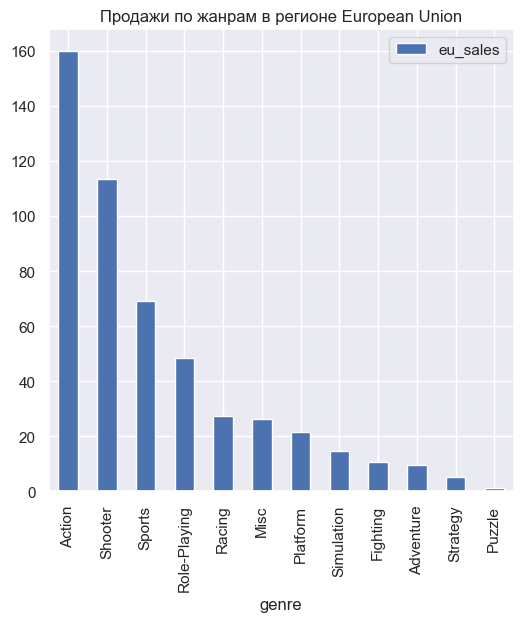

In [54]:
actual_data_sorted_genre_eu = actual_data_sorted_regions.groupby(['genre'])[['eu_sales']].agg('sum').round(1).sort_values(by='eu_sales', ascending=False) 
print('Продажи по жанрам в регионе European Union, всего:', actual_data_sorted_genre_eu['eu_sales'].sum().round(1))
print()
print(actual_data_sorted_genre_eu)
print()

actual_data_sorted_genre_eu.plot(title='Продажи по жанрам в регионе European Union', kind='bar', grid=True, figsize=(6, 6), legend=True)
plt.show()

<b> Самые популярные жанры в EU (European Union), доля от всех продаж в регионе: </b> <br>
1. Action - 31.5% 
2. Shooter - 22.4%
3. Sports - 13.6%
4. RPG - 9.5%
5. Racing - 5.4%
<br>


#### Топ-5 жанров для региона JP (Japan)

Продажи по жанрам в регионе Japan, всего: 192.6

              jp_sales
genre                 
Role-Playing      65.5
Action            52.8
Misc              12.9
Simulation        10.4
Fighting           9.4
Shooter            9.2
Platform           8.6
Adventure          8.2
Sports             8.0
Strategy           3.0
Racing             2.5
Puzzle             2.1



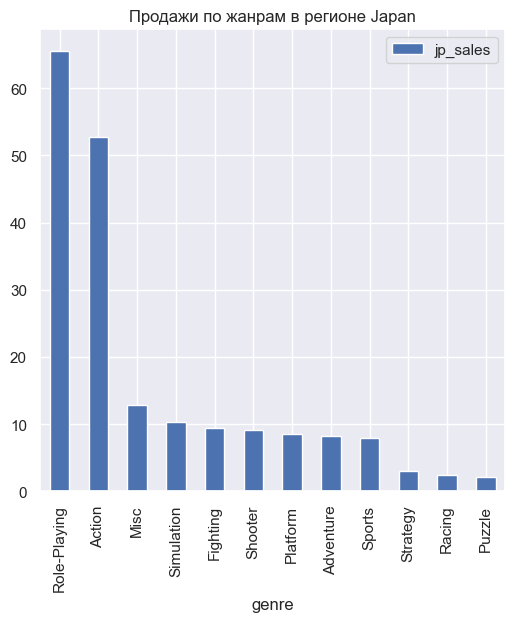

In [55]:
actual_data_sorted_genre_jp = actual_data_sorted_regions.groupby(['genre'])[['jp_sales']].agg('sum').round(1).sort_values(by='jp_sales', ascending=False) 
print('Продажи по жанрам в регионе Japan, всего:', actual_data_sorted_genre_jp['jp_sales'].sum().round(1))
print()
print(actual_data_sorted_genre_jp)
print()

actual_data_sorted_genre_jp.plot(title='Продажи по жанрам в регионе Japan', kind='bar', grid=True, figsize=(6, 6), legend=True)
plt.show()

<b> Самые популярные жанры в JP (Japan), доля от всех продаж в регионе: </b> <br>
1. RPG - 34% 
2. Action - 27.4%
3. Misc - 6.7%
4. Simulation - 5.4%
5. Fighting - 4.9%
<br>


#### Топ-5 жанров для остальных стран

Продажи по жанрам в остальных странах, всего: 156.3

              other_sales
genre                    
Action               51.2
Shooter              37.3
Sports               22.4
Role-Playing         14.8
Misc                  7.7
Racing                6.5
Platform              5.6
Fighting              4.5
Adventure             2.8
Simulation            2.2
Strategy              1.1
Puzzle                0.2



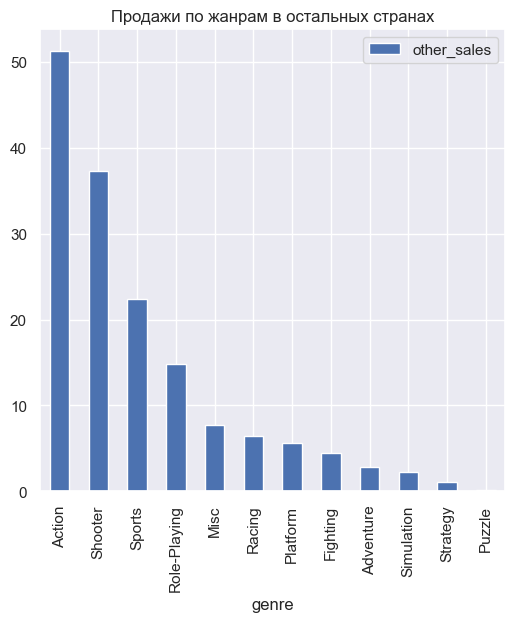

In [56]:
actual_data_sorted_genre_others = actual_data_sorted_regions.groupby(['genre'])[['other_sales']].agg('sum').round(1).sort_values(by='other_sales', ascending=False) 
print('Продажи по жанрам в остальных странах, всего:', actual_data_sorted_genre_others['other_sales'].sum().round(1))
print()
print(actual_data_sorted_genre_others)
print()

actual_data_sorted_genre_others.plot(title='Продажи по жанрам в остальных странах', kind='bar', grid=True, figsize=(6, 6), legend=True)
plt.show()

<b> Самые популярные жанры в остальных странах, доля от всех продаж в регионе: </b> <br>
1. Action - 32.7%  
2. Shooter - 23.9%
3. Sports - 14.3%
4. RPG - 9.5%
5. Misc - 4.9%

<br>


#### Вывод по жанрам и продажам в регионах:

* В <b>NA</b> и остальных странах распределение жанров идентично (Action, Shooter, Sports, RPG, Misc).
* В <b>EU</b> ситуация очень похожа на <b>NA</b>, только на 5-м месте вместо Misc у EU - Racing.
* В <b>JP</b> преобладает любовь к RPG, Action только на 2-м месте. Зато два жанра в сумме дают 61.4% рынка. Можно сказать, что японцы весьма консервативны в выборе жанров, т.к. на остальные 3 приходится от 5 до 6% рынка.
* В <b>JP</b> в топ-5 попали такие экзотические жанры, как Simulation и Fighting.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Вспомним, какие бывают рейтинги ESRB:
* <b> EC</b> - для детей младшего возраста, от 3 лет, неприемлемое содержание отсутствует. Пример: Дора.
* <b> E</b> - для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
* <b> E 10+</b> - для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft, Зомби против растений.
* <b> T </b>- для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
* <b> M </b>- для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival, Destiny 2.
* <b> AO </b>- для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.
* <b> RP </b> -	категория ESRB ещё не присвоена.

#### Рейтинг ESRB и продажи в NA

Продажи в регионе North America, всего: 591.1

         na_sales
rating           
M           231.7
E           114.4
Unknown     103.3
E10+         75.7
T            66.2
RP            0.0



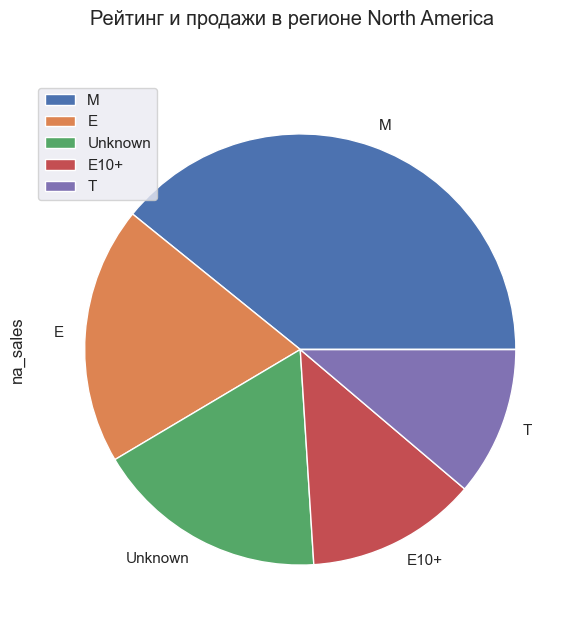

In [57]:
actual_data_sorted_rating_na = actual_data_sorted_regions.groupby(['rating'])[['na_sales']].agg('sum').round(1).sort_values(by='na_sales', ascending=False) 
print('Продажи в регионе North America, всего:', actual_data_sorted_genre_na['na_sales'].sum().round(1))
print()
print(actual_data_sorted_rating_na)
print()

actual_data_sorted_rating_na.plot(title='Рейтинг и продажи в регионе North America', kind='pie', subplots=True, grid=True, figsize=(7, 7), legend=True)
plt.show()

<b> Рейтинги в NA, доля от общих продаж региона:</b>

* М - 39%, абсолютный лидер.
* E - 19.3% 
* Unknown - 17.4%
* E 10+ - 12.8%
* T - 11.1%

#### Рейтинг ESRB и продажи в EU

Продажи в регионе EU, всего: 507.5

         eu_sales
rating           
M           194.4
E           113.0
Unknown      91.5
E10+         55.4
T            53.0
RP            0.0



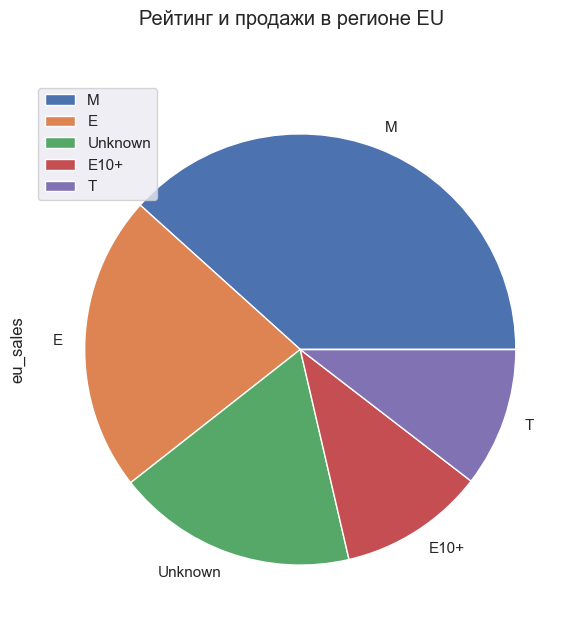

In [58]:
actual_data_sorted_rating_eu = actual_data_sorted_regions.groupby(['rating'])[['eu_sales']].agg('sum').round(1).sort_values(by='eu_sales', ascending=False) 
print('Продажи в регионе EU, всего:', actual_data_sorted_genre_eu['eu_sales'].sum().round(1))
print()
print(actual_data_sorted_rating_eu)
print()

actual_data_sorted_rating_eu.plot(title='Рейтинг и продажи в регионе EU', kind='pie', subplots=True, grid=True, figsize=(7, 7), legend=True)
plt.show()

<b> Рейтинги в EU, доля от общих продаж региона:</b>

* М - 38.3%, абсолютный лидер.
* E - 22.2% 
* Unknown - 18%
* E 10+ - 10.9%
* T - 10.4%

#### Рейтинг ESRB и продажи в JP

Продажи в регионе JP, всего: 192.6

         jp_sales
rating           
Unknown     109.0
E            28.3
T            26.0
M            21.2
E10+          8.2
RP            0.0



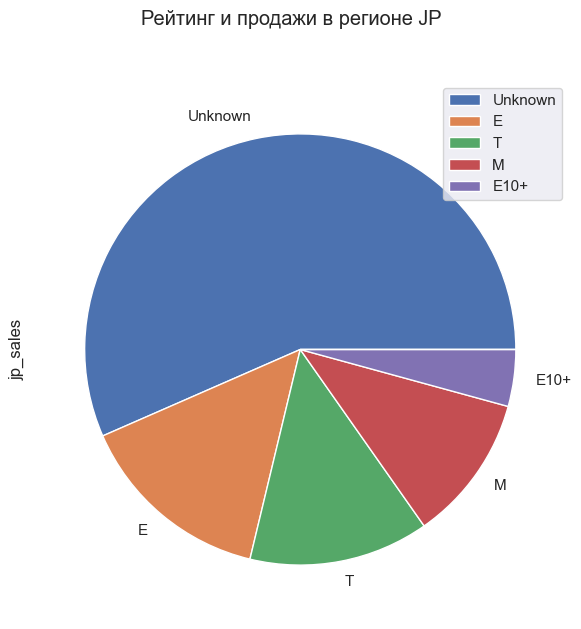

In [59]:
actual_data_sorted_rating_jp = actual_data_sorted_regions.groupby(['rating'])[['jp_sales']].agg('sum').round(1).sort_values(by='jp_sales', ascending=False) 
print('Продажи в регионе JP, всего:', actual_data_sorted_genre_jp['jp_sales'].sum().round(1))
print()
print(actual_data_sorted_rating_jp)
print()

actual_data_sorted_rating_jp.plot(title='Рейтинг и продажи в регионе JP', kind='pie', subplots=True, grid=True, figsize=(7, 7), legend=True)
plt.show()

<b> Рейтинги в JP, доля от общих продаж региона:</b>

* Unknown - 56.6%
* E - 14.7% 
* T - 13.5%
* M - 11%
* E 10+ - 4.2%

#### Рейтинг ESRB и продажи в остальном мире

Продажи в остальном мире, всего: 156.3

         other_sales
rating              
M               63.4
E               31.4
Unknown         27.2
T               18.0
E10+            16.2
RP               0.0



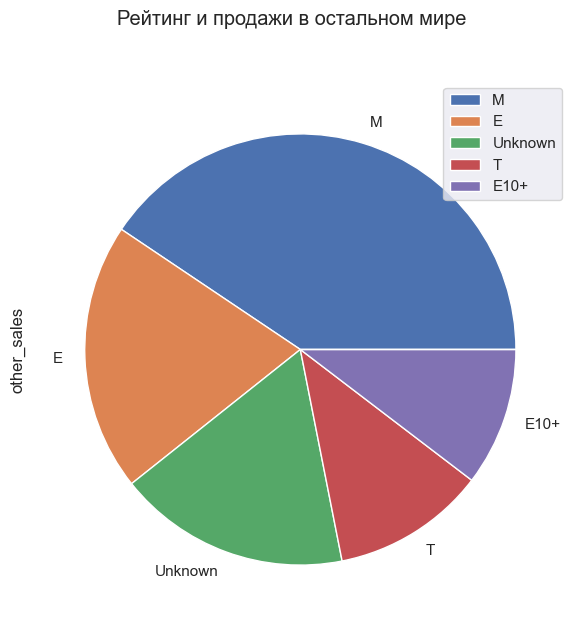

In [60]:
actual_data_sorted_rating_others = actual_data_sorted_regions.groupby(['rating'])[['other_sales']].agg('sum').round(1).sort_values(by='other_sales', ascending=False) 
print('Продажи в остальном мире, всего:', actual_data_sorted_genre_others['other_sales'].sum().round(1))
print()
print(actual_data_sorted_rating_others)
print()

actual_data_sorted_rating_others.plot(title='Рейтинг и продажи в остальном мире', kind='pie', subplots=True, grid=True, figsize=(7, 7), legend=True)
plt.show()

<b> Рейтинги в остальном мире, доля от общих продаж:</b>

* M - 40.6%
* E - 20.1% 
* Unknown - 17.4%
* T - 11.5%
* E 10+ - 10.4%

#### Вывод по рейтингам и их влиянию на продажи:

* В целом рейтинги выглядят похоже по всем регионам.
* В <b> NA, EU и остальном мире </b> преобладает рейтинг M (mature, для лиц старше 17 лет) - от 38 до 40.6% продаж.
* К сожалению, в <b>JP</b> достаточного много неизвестных данных о рейтингах, поэтому на первом месте Unknown - 56.6%.
* Абсолютно <b>везде</b> рейтинг E (everyone, для всех) занимает второе место (от 14.7 до 22.2% продаж).
* Рейтинг E 10+ (для детей старше 10 лет) в <b>NA, EU и остальном мире</b> примерно 11-12%, и только в <b>JP</b> он ниже - всего 4.2%. 


## Проверка гипотез
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему


### Гипотеза : "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Проверка гипотез начинается с формулировки H0 (нулевой гипотезы). <br>
Исходя из H0 формулируется H1 (альтернативная гипотеза). Это утверждение, которое принимается верным, если отбрасывается H0.
Сформулируем наши гипотезы так:

* **H0:** Средний пользовательский рейтинг XOne **равен** среднему пользовательскому рейтингу PC.
* **H1:** Средний пользовательский рейтинг XOne **не равен** среднему пользовательскому рейтингу PC. 
    
H0 у нас - это гипотеза о равенстве средних двух генеральных совокупностей.
<br><br>
<b> Для начала:</b>
* создадим выборки user_score PC и user_score XOne. 
* уберем значения -1.
* посчитаем, сколько строк у нас получилось в каждой выборке.

In [61]:
#Берем для нашего исследования выборку по столбцам platform и user_score:
user_score_sample = actual_data[['platform', 'user_score']] 

#Сделаем выборку для PC и уберем из user_score наши рабочие значения -1:
user_score_pc = user_score_sample.loc[user_score_sample.loc[ :,'platform'] == 'PC'].sort_values(by='user_score', ascending=False) 
user_score_pc = user_score_pc.loc[user_score_pc.loc[ :,'user_score'] != -1]
print(user_score_pc.head())
print()
print('Всего строк user_score для PC:', user_score_pc['user_score'].count())
print()

#Сделаем выборку для Xbox One и уберем из user_score наши рабочие значения -1:
user_score_xone = user_score_sample.loc[user_score_sample.loc[ :,'platform'] == 'XOne'].sort_values(by='user_score', ascending=False) 
user_score_xone = user_score_xone.loc[user_score_xone.loc[ :,'user_score'] != -1]
print(user_score_xone.head())
print()
print('Всего строк user_score для Xbox One:', user_score_xone['user_score'].count())


      platform  user_score
2851        PC         9.3
9135        PC         8.9
14400       PC         8.7
15851       PC         8.7
9410        PC         8.7

Всего строк user_score для PC: 213

      platform  user_score
1499      XOne         9.2
13643     XOne         8.9
16140     XOne         8.8
9374      XOne         8.7
4887      XOne         8.6

Всего строк user_score для Xbox One: 182



Далее необходимо посчитать среднее значение при условии, что H0 верна.
<br><br>
В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:
<i> scipy.stats.ttest_ind (array1, array2, equal_var) </i>
<br><br>
Так как выборки у нас не слишком большие, отличаются по размеру (213 и 182) и есть сомнения, что дисперсии совокупностей одинаковые, укажем параметр <i> equal_var = False</i>, тогда тест посчитает дисперсии выборок по отдельности.
<br><br>
Уровень статистической значимости alpha обозначим 0.05.


In [62]:
user_score_pc_sample = user_score_pc['user_score']
user_score_xone_sample = user_score_xone['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(user_score_pc_sample, user_score_xone_sample, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5926101248514615
Не получилось отвергнуть нулевую гипотезу


Мы получили результат, что гипотеза H0: <i> Средний пользовательский рейтинг XOne == среднему пользовательскому рейтингу PC </i> <b>верна</b>.

### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.


Гипотеза H0 всегда формулируется так, чтобы использовать знак равенства, т.е. чтобы все данные лежали в районе изначально предполагаемого значения.
Например, если мы выясняем, есть ли разница между совокупностями (как в нашем случае), то H0 будет такой: "разницы нет, исследуемые параметры равны".
Поэтому гипотезы H0 и H1 мы сформулируем так:

* **H0:** Между средним пользовательским рейтином жанра Action и средним пользовательским рейтингом жанра Sports **разницы нет**, исследуемые параметры **равны**.
* **H1:** Между средним пользовательским рейтином жанра Action и средним пользовательским рейтингом жанра Sports **разница есть**, исследуемые параметры **не равны**. 

Данная гипотеза H0 двусторонняя, так как может быть и средний пользовательский рейтинг жанра Action при условий неравенства может быть как >, так и < среднего пользовательского рейтинга жанра Sports. <br>


In [63]:
#Берем для нашего исследования выборку по столбцам genre и user_score:
user_score_genre_sample = actual_data[['genre', 'user_score']] 

#Сделаем выборку для Action и уберем из user_score наши рабочие значения -1:
user_score_action = user_score_genre_sample.loc[user_score_genre_sample.loc[ :,'genre'] == 'Action'].sort_values(by='user_score', ascending=False) 
user_score_action = user_score_action.loc[user_score_action.loc[ :,'user_score'] != -1]
user_score_action_sample = user_score_action['user_score']
print(user_score_action.head())
print('Всего строк user_score жанра Action:', user_score_action['user_score'].count())

#Также для самопроверки на будущее можем посмотреть, каково среднее у user_score жанра Action:
print('Среднее user_score жанра Action:', user_score_action['user_score'].mean())
print()

#Сделаем выборку для Sports и уберем из user_score наши рабочие значения -1:
user_score_sports = user_score_genre_sample.loc[user_score_genre_sample.loc[ :,'genre'] == 'Sports'].sort_values(by='user_score', ascending=False) 
user_score_sports = user_score_sports.loc[user_score_sports.loc[ :,'user_score'] != -1]

#Найдем среднее для user_score жанра Sports, оно пригодится нам в t-тесте:
sports_mean = user_score_sports['user_score'].mean()
print(user_score_sports.head())
print()
print('Всего строк user_score жанра Sports:', user_score_sports['user_score'].count())
print('Среднее user_score жанра Sports:', sports_mean)


        genre  user_score
149    Action         9.1
677    Action         9.0
448    Action         8.9
7843   Action         8.8
16140  Action         8.8
Всего строк user_score жанра Action: 526
Среднее user_score жанра Action: 6.82509505703422

        genre  user_score
16142  Sports         8.8
5120   Sports         8.7
6891   Sports         8.3
12834  Sports         8.2
4940   Sports         8.2

Всего строк user_score жанра Sports: 195
Среднее user_score жанра Sports: 5.455897435897437


**Проверка гипотезы** <br>
Можем проверить двусторонюю гипотезу с помощью метода <i>scipy.stats.ttest_1samp (array, popmean)</i>, это t-тест.
<br><br>
Методу передаются параметры:
* array - массив (в нашем случае это будет массив user_score жанра Action).
* popmean - "среднее в популяции", предполагаемое среднее, на равенство которому делаем тест (в нашем случае это будет среднее для user_score жанра Sports, т.е. <i> sports_mean </i>, которое мы уже нашли выше).

In [64]:
# Итак, sports_mean мы уже находили выше. Проверим гипотезу:

alpha = .05 # критический уровень статистической значимости

results = st.ttest_1samp(
    user_score_action_sample, 
    sports_mean)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.166331275728059e-81
Отвергаем нулевую гипотезу


<b> Мы отвергли нулевую гипотезу H0: </b> <br>
<i>Между средним пользовательским рейтином жанра Action и средним пользовательским рейтингом жанра Sports разницы нет, исследуемые параметры равны.
</i>
<br>
Следовательно, мы принимаем гипотезу H1 о том, что исследуемые параметры не равны или <b>разные</b>.

## Общий вывод

Перед нами стояла задача — выполнить предобработку данных о компьютерных играх и исследовать их, чтобы выявить определяющие успешность игры закономерности.
<br> Это позволит нам сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й год.

Мы работали с данными до 2016 года, их качество было неоднородным. Мы столкнулись с пропусками, промежуточными значениями, несоответствием типов данных их столбцам и т.д.

**I. Проведена следующая работа по предобработке данных**:
1. Заполнены пропуски в 6 столбцах, таких как: 
    * 'critic_score', 'user_score' - добавили рабочее значение -1.
    * 'rating' - заменили пропуски на Unknown.
    * 'year_of_release' - вручную нашли все 269 пропусков и заполнили.
    * 'name' и 'genre' - удалили 2 строки, т.к. пропуски были именно в этих 2 строках, и их невозможно было идентифицировать.
<br><br>
2. Столбец 'critic_score' содержал оценки от 0 до 100, а в столбце 'user_score' оценки были от 0 до 10, что было не слишком удобно для сравнения. Привели рейтинги user_score и critic_score к единому виду - от 0 до 10.
<br><br>
3. В столбце 'user_score' встречалась оценка tbd - to be discussed, т.е. оценка игры была неизвестна на момент внесения в базу.
Мы заменили значение tbd на -1.
 <br><br>
4. Типы данных были изменены для столбцов:
* Year of release - сменили с float на integer
* User_score - сменили с object на float
<br> 
5. Добавлен новый столбец 'all_sales', сумма четырех столбцов: 'na_sales', 'eu_sales', 'jp_sales' и 'other_sales'.
 <br><br> 
6. Обновлен порядок столбцов, чтобы новый столбец продаж шел перед остальными тремя.
 <br><br> 
7. Проведена проверка на явные и неявные дубликаты.  <br>

Из положительного - почти не потеряли данные, убрали только 2 строки из почти 17 тысяч.
 <br><br> <br> 
**II. С обновленными данными выполнена следующая исследовательская работа:**

**1.	Изучено, сколько игр выпускалось в разные годы.** <br> 
Мы видим, что большая часть игр была выпущена за пятнадцать лет - с 2002 по 2016 годы - 13867 из 16713 (или 83%).<br> 
В то время как с 1977 по 1993 годы вышло всего 385 игр (или 2.2%).<br>
На этом основании предварительно сокращена выборка до игр с 1994 по 2016.<br> 
<br> 
**2.	Изучено, как менялись продажи по платформам.** <br>  

В топ-10 платформ из 29 по продажам за период с 1994 по 2016 вошли:
PS2
X360
PS3
Wii
DS
PS
GBA
PS4
PSP
3DS
<br>
Узнали, что большинство платформ живет в среднем около 7-8 лет.<br>
В самом начале продолжительность "жизни" платформ была еще короче - до 5 лет (Snes, Gen, SCD, NG, SAT и др.)<br>
Исключение - PC (компьютер), на нем игры появляются всегда.<br>
Среди платформ "долгожителями" можно считать Wii, PS2 и X360 - 10 и более лет.<br>
<br>
**3. Определен актуальный период для исследования.**<br>

На основании полученной выше информации я предлагаю считать актуальным периодом пятилетний промежуток **с 2012 по 2016 годы включительно**, учитывая минимальный срок жизни платформ в 5 лет и окончание выхода в 2008 году игр на такие платформы, как Xbox, DC, PSV, а в 2011 - на самую продаваемую по играм платформу PS2.<br>
Если бы мы оставили ее в выборке, это не слишком помогло бы в нашем исследовании, но повлияло бы на его чистоту.<br>
Кроме того, в 2012-2013 годах появились новые платформы: WiiU, PS4, XOne.<br>
В ближайшие годы очередной ряд платформ уступит свое лидерство (X360, PS3 и другие), и можно будет отследить эту тенденцию.
 <br><br>
<br>
**4. Не учитывать в работе данные за предыдущие годы.**<br>
Таким образом,  получилась выборка actual_data за 5 лет, с 2012 по 2016 годы включительно, в количестве 2900 строк.<br>
С 2012 года у нас остается 11 платформ:
'WiiU' 'DS' 'PS3' 'Wii' '3DS' 'PC' 'X360' 'PSP' 'PSV' 'XOne' 'PS4'. <br>
<br>
Для каждой из 11 платформ мы построили свою табличку и свой график, чтобы повнимательнее изучить динамику продаж внутри платформ по годам, и сделали следующие выводы:<br>
* У **Wii** продажи по годам падают из года в год, мы видим, как некогда одна из крупнейших по продажам платформ угасает.
* Та же ситуация с падением продаж у **Nintendo DS**. По сути, 2013 год - последний год выхода игр на DS, и эта платформа становится неактуальной. Из интересного, продажи игр на Nintendo DS в 2012 году в 2 раза ниже, чем у Nintendo Wii.
* Удивительно, но суммарные продажи игр на **PC** тоже сокращаются из года в год. И 2012 год был максимальным по объемам продаж в нашей выборке 2012-2016 годов. Учитывая, что новые игры появляются на PC с самых ранних времен, и их продолжают выпускать, интересно, с чем может быть связано падение продаж.
* У платформы **PlayStation 3** в 2012-2013 году был небольшой рост продаж, но далее - резкий обвал и сохранение тенденции к снижению. К 2016 году продаж практически не осталось. Возможно потом, что в 2011 году только закончился выход игр на PS2, а уже в 2013 году на рынке появилась PS4, и для роста продаж на PS3 было не так много возможностей.
* У **Nintendo 3DS** более равномерное распределение продаж за последние 5 лет. Небольшой рост с 2012 по 2013 годы, далее - пусть и плавное, но снижение.
* У **Nintendo WiiU** были очень неплохие показатели за последние 5 лет, но в 2016 году продажи существенно снизились.
* Объем продаж игр на **PSP** был значительно меньше, чем на разные консоли Nintendo (DS, 3DS, Wii и другие). И снова мы видим существенный спад продаж после 2012 года. В 2014 и 2015 продажи почти полностью сократились, а за 2016 год вообще нет информации.
* У платформы **Xbox 360** пока что самые большие объемы продаж из исследованных нами платформ. И вновь очевидно, как после плодотворных 2012-2013 лет пошло резкое падение, а к 2016 году объем продаж сократился по сравнению с 2012 годом почти в 100 раз.
* Платформа **PS Vita** показывала неплохую динамику в 2012-2014 годах, но 2015-2016 принесли существенное сокращение объемов.
* У **Xbox One** продажи показывали рост с 2013 по 2015 годы. В 2016 заметно снижение.
* Есть подозрение, что **данные за 2016 год неполные** для всех платформ. Так как даже на примере новой консоли, Xbox One, мы видим внезапное падение продаж именно в 2016-м. И в целом, за все проанализированные нами графики, ни у одной платформы не было роста в 2016-м.
* Безусловным рекордсменом по продажам в 2014-2015 годах является **PlayStation 4**, выпущенная в 2013-м. Платформа показывает уверенный рост.
<br>

**5.	Выяснили, какие платформы лидируют по продажам, растут или падают. Выбрали топ потенциально прибыльных платформ.**
<br>
Мы предположили, что данные за 2016 год неполные, и сравнили данные за 2015 по объемам продаж топ-3 платформ: PS4, Xbox One и Nintendo 3DS. <br>

**Топ-3 растущих по объему продаж платформ:**
1. PS4 - 118.90
2. Xbox One - 60.14
3. Nintendo 3DS - 27.78
<br>

**Топ-3 платформ-лидеров падения продаж:**
1. PS Vita - 6.25
2. Xbox 360 - 11.96
3. Nintendo WiiU - 16.35
*PSP - 0.12 (не берем в расчет, так как это уже изжившая себя платформа)

<br>
<b>Потенциально прибыльными платформами для нас являются:</b><br>
1. PS4<br>
2. Xbox One<br>
3. Nintendo 3DS<br>
4. PC - ПК взять вынуждены тоже, несмотря на не слишком высокие объемы продаж.
<br><br>

**6. Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**<br>
Нашли межквартильный размах и "усы", в которые попадают нормальные значения, а за пределами которых находятся выбросы.<br>
Сделали вывод, что выбросов у нас практически нет.<br>
При этом среднее арифметическое всех продаж (mean) составляет 131.61, а медиана равна 82.19.<br>
Стоит отметить, что среднее арифметическое почти в два раза превышает медиану.<br>
Это неудивительно, так как min и max значения отличаются почти в 30 раз (11.31 для PSP и 314.14 для PS4).<br>

**7. Выяснили, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами.** 
<br> <br>
**8. Сделали выводы о продажах игр на других платформах:**<br> 
* Для всех платформ характерна слабая положительная зависимость от отзывов критиков - чем выше оценка, тем лучше продажи.<br>
* Удивительно, но отзывы пользователей по результатам нашего исследования не показали взаимосвязь, т.е. оценка игроков не влияет на продажи.<br>
* Средний объем продаж по медиане (median) составляет 82.19, при этом среднее арифметическое (mean) почти в два раза превышает медиану (131.61).<br>
* Разница в выборке из 11 платформ между min и max значениями продаж - почти в 30 раз.<br>
* Продажи топ-3 платформ, PS4, PS3 и Xbox One, составляют больше половины (58%) всех продаж выбранных 11 платформ (839.66 от 1447.75).<br><br>

**9. Посмотрели на общее распределение игр по жанрам. Нашли самые прибыльные жанры, а также жанры с низкими продажами** <br>

<b>Самые прибыльные жанры: </b> <br>
1. Action - 30% всех продаж
2. Shooter - 21% всех продаж
3. RPG - 13% всех продаж
<br>

Т.е. в сумме топ-3 прибыльных жанров составляют 64% всех продаж, а всего жанров у нас 12.
<br><br>
При этом любопытно распределение по количеству выпущенных игр.<br> 
На 1 месте тот же жанр Action, а вот RPG по количеству игр на 2-м, а по продажам - на 3-м.<br> <br>
И самое удивительное, жанр Shooter - 5-е место по количеству изданных игр и 2-е по продажам. <br>
Игр жанра Shooter выпускают <b> в 4 раза меньше </b>, чем Action, но по объему продаж Shooter уступает Action всего на 30%.

<br>
<b>Самые низкие продажи у игр следующих жанров:</b> <br>
1. Puzzle - 2% всех продаж <br>
2. Strategy - 5.1% всех продаж <br> 
3. Simulation - 5.3% всех продаж
<br><br>
Здесь количество изданных игр жанров Puzzle, Strategy, Simulation соответствует прибыльности от них.
<br><br>
<b>10. Составили портрет пользователя каждого региона (NA, EU, JP, остальной мир):</b>
<br><br>
10.1 Узнали самые популярные платформы (топ-5) по регионам и сделали вывод по платформам и продажам в регионах:</b>
<br><br>
* В <b>NA</b> лидирует XBox 360, занимает четверть рынка региона.<br>
* В <b>NA</b> продажи PS3 и PS4 почти одинаковы, что любопытно, так как PS3 - приставка прошлого поколения.<br>
* В <b>JP</b> с большим отрывом побеждает Nintendo 3DS  - почти половина всех продаж в регионе.<br>
* В <b>JP</b> в топ-5 вошли экзотические PS Vita и Nintendo WiiU.<br>
* В <b>JP</b> любят портативные игры, а не станционарные приставки. В сумме 3DS, PSV, WiiU - это 63.2%  рынка.<br>
* В <b>EU</b> лидирует PS4, занимая четверть рынка.<br>
* В <b>EU</b> явно предпочитают станционарные приставки. Портативные игры в виде Nintendo 3DS занимают лишь 8%.<br>
* Предпочтения платформ в <b>EU</b> и <b>остальном мире</b> идентичны (PS4, PS4, X360, XOne и 3DS).<br>
* В целом в регионах <b>NA, EU, JP</b> платформа PS3 стабильно занимает примерно 18% рынка. Выше только в остальном мире - 27.7%. <br><br>   
10.2 Узнали самые популярные жанры (топ-5) по регионам и сделали вывод по жанрам и продажам в регионах:</b>
<br><br>
* В <b>NA</b> и остальных странах распределение жанров идентично (Action, Shooter, Sports, RPG, Misc).<br>
* В <b>EU</b> ситуация очень похожа на <b>NA</b>, только на 5-м месте вместо Misc у EU - Racing.<br>
* В <b>JP</b> преобладает любовь к RPG, Action только на 2-м месте. Зато два жанра в сумме дают 61.4% рынка. Можно сказать, что японцы весьма консервативны в выборе жанров, т.к. на остальные 3 приходится от 5 до 6% рынка.<br>
* В <b>JP</b> в топ-5 попали такие экзотические жанры, как Simulation и Fighting.
<br><br>
10.3 Сделали вывод по рейтингам и их влиянию на продажи:<br>
<br>
* В целом рейтинги выглядят похоже по всем регионам.<br>
* В <b> NA, EU и остальном мире </b> преобладает рейтинг M (mature, для лиц старше 17 лет) - от 38 до 40.6% продаж.<br>
* К сожалению, в <b>JP</b> достаточного много неизвестных данных о рейтингах, поэтому на первом месте Unknown - 56.6%.<br>
* Абсолютно <b>везде</b> рейтинг E (everyone, для всех) занимает второе место (от 14.7 до 22.2% продаж).<br>
* Рейтинг E 10+ (для детей старше 10 лет) в <b>NA, EU и остальном мире</b> примерно 11-12%, и только в <b>JP</b> он ниже - всего 4.2%.<br><br>
<b>11. Проверили гипотезы и получили результат "верно": </b><br>
•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br>
•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<br>